In [547]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [548]:
import yfinance as yf

# Define the ticker symbol (e.g., WTI crude oil symbol)
ticker = 'CL=F'  # This is the symbol for WTI crude oil futures on Yahoo Finance

# Download historical data for a specific time range (e.g., last 5 years)
df = yf.download(ticker, start="2005-04-16", end="2025-04-20")

# Print the first few rows of the data
print(df.head())


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open  Volume
Ticker           CL=F       CL=F       CL=F       CL=F    CL=F
Date                                                          
2005-04-18  50.369999  51.200001  49.660000  50.430000   70860
2005-04-19  52.290001  52.349998  50.299999  50.299999   59946
2005-04-20  52.439999  53.099998  51.950001  52.189999  120966
2005-04-21  54.200001  54.299999  53.000000  53.869999   99239
2005-04-22  55.389999  55.900002  54.200001  54.230000  113285


In [549]:
df.columns

MultiIndex([( 'Close', 'CL=F'),
            (  'High', 'CL=F'),
            (   'Low', 'CL=F'),
            (  'Open', 'CL=F'),
            ('Volume', 'CL=F')],
           names=['Price', 'Ticker'])

In [550]:
print(col[0] for col in df.columns)

<generator object <genexpr> at 0x3e1fabc60>


In [551]:
import pandas as pd

# Flatten MultiIndex columns
df.columns = [col[0] for col in df.columns]

# Verify the updated columns
print(df.head(-5))


                Close       High        Low       Open  Volume
Date                                                          
2005-04-18  50.369999  51.200001  49.660000  50.430000   70860
2005-04-19  52.290001  52.349998  50.299999  50.299999   59946
2005-04-20  52.439999  53.099998  51.950001  52.189999  120966
2005-04-21  54.200001  54.299999  53.000000  53.869999   99239
2005-04-22  55.389999  55.900002  54.200001  54.230000  113285
...               ...        ...        ...        ...     ...
2025-04-04  61.990002  66.900002  60.450001  66.639999  559638
2025-04-07  60.700001  63.900002  58.950001  61.119999  597617
2025-04-08  59.580002  61.750000  57.880001  61.029999  557655
2025-04-09  62.349998  62.930000  55.119999  58.320000  592250
2025-04-10  60.070000  63.340000  58.759998  62.709999  391826

[5027 rows x 5 columns]


In [552]:
df.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

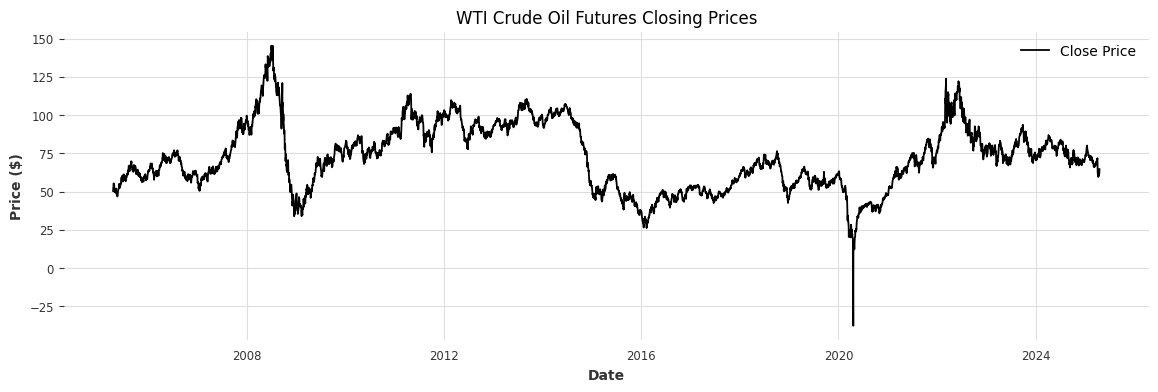

In [553]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))
plt.plot(df.index, df['Close'], label='Close Price')
plt.title('WTI Crude Oil Futures Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.legend()
plt.show()


### Upward -> Show sustained demand or supply cuts, Downward-> OverSupply
### Flat-> Balanced

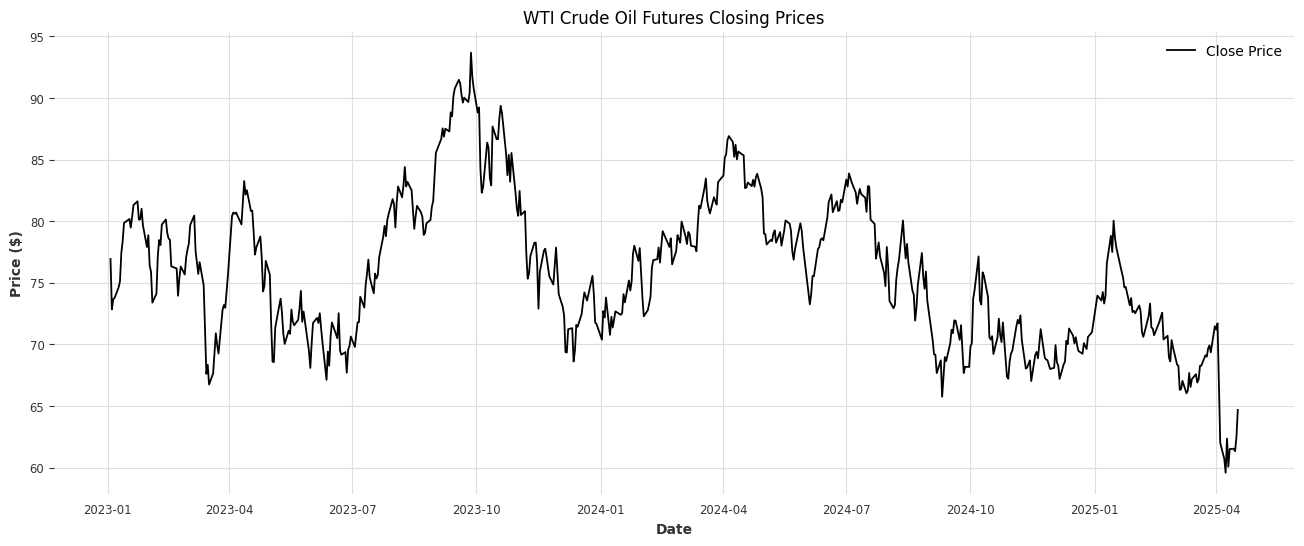

In [567]:
import matplotlib.pyplot as plt
filter_df=df.loc['2023-01-01':'2025-04-21']
plt.figure(figsize=(16,6))
plt.plot(filter_df.index, filter_df['Close'], label='Close Price')
#plt.xlim('2025-01-01','2025-13-04')
plt.title('WTI Crude Oil Futures Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.legend()
plt.show()


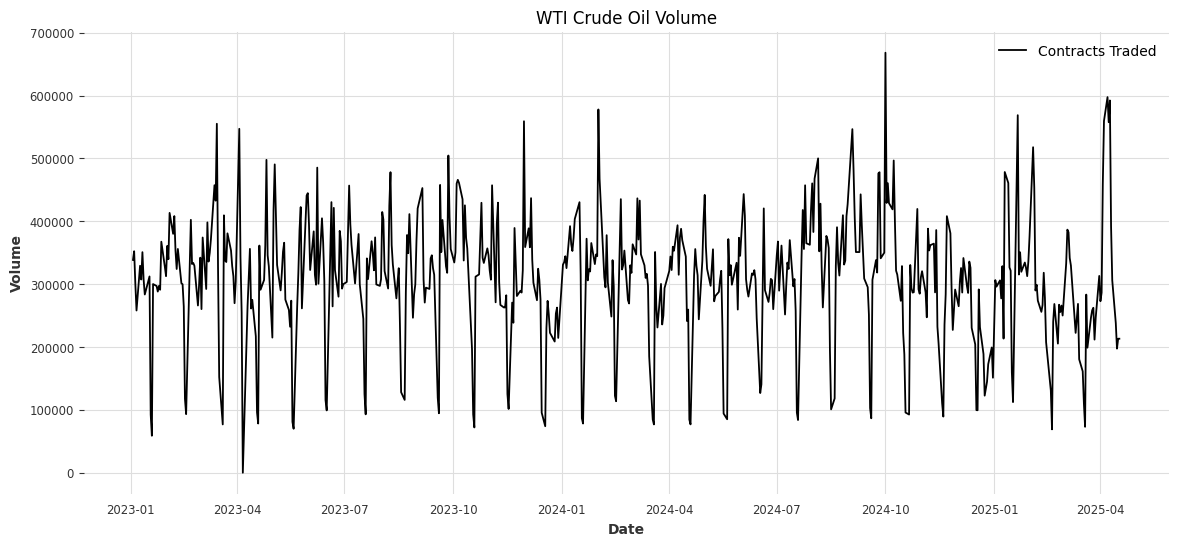

In [568]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(filter_df.index, filter_df['Volume'], label='Contracts Traded')
plt.title('WTI Crude Oil Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.legend()
plt.show()


/var/folders/0w/c3kpnktn3s39bj857lm6hgc00000gn/T/ipykernel_50167/2546995569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_df['Return']=filter_df['Close'].pct_change()


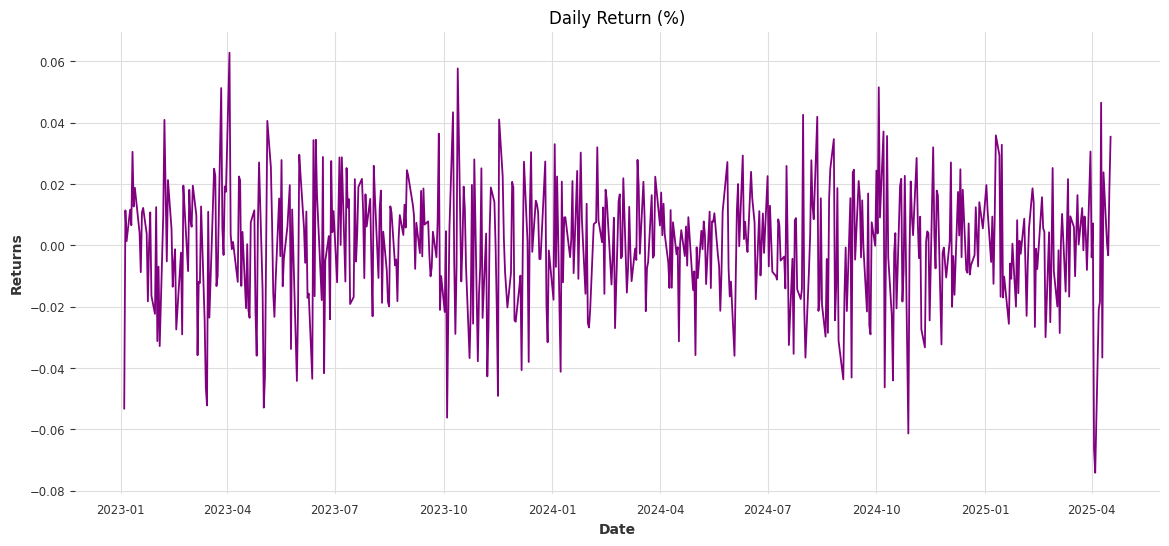

In [569]:

filter_df['Return']=filter_df['Close'].pct_change()
plt.figure(figsize=(14,6))
plt.plot(filter_df.index,filter_df['Return'],color='purple')
plt.title('Daily Return (%)')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.grid(True)
plt.show()


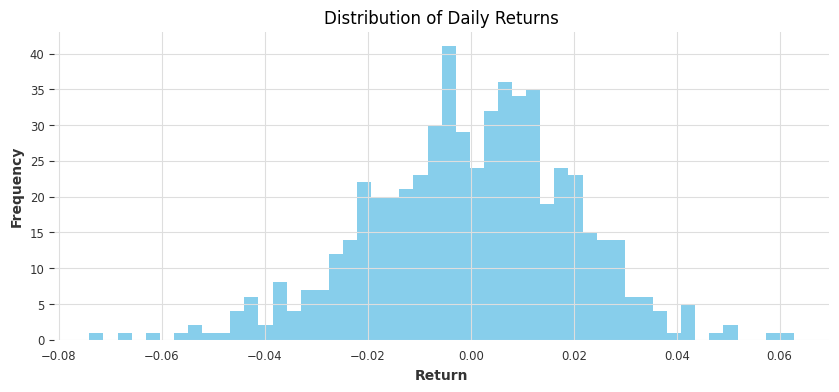

In [570]:
filter_df['Return'].hist(bins=50, figsize=(10, 4), color='skyblue')
plt.title('Distribution of Daily Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


/var/folders/0w/c3kpnktn3s39bj857lm6hgc00000gn/T/ipykernel_50167/3327048264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_df['Return']=filter_df['Close'].pct_change()


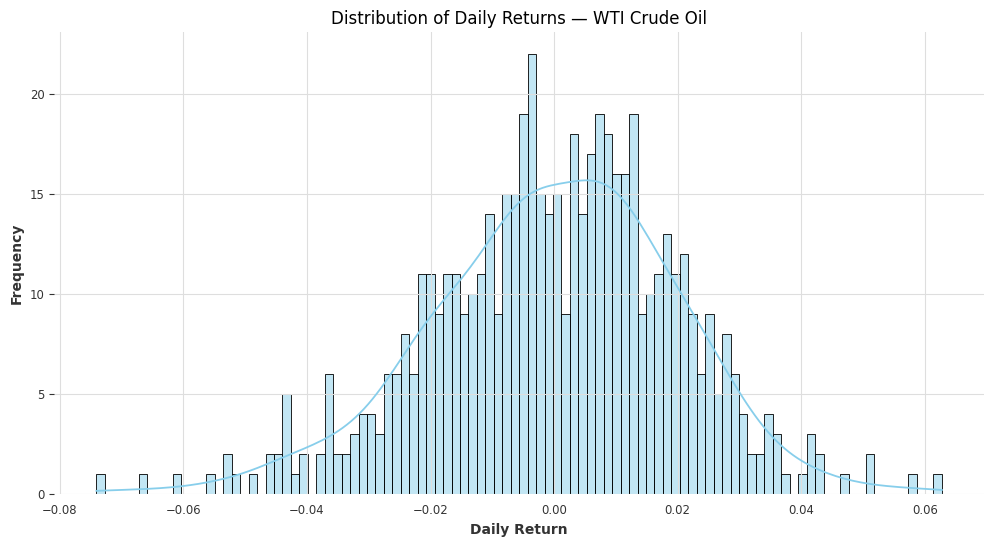

In [571]:
import matplotlib.pyplot as plt
import seaborn as sns
filter_df['Return']=filter_df['Close'].pct_change()
plt.figure(figsize=(12,6))
sns.histplot(filter_df['Return'].dropna(), bins=100, kde=True, color='skyblue')

plt.title('Distribution of Daily Returns — WTI Crude Oil')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [572]:
print("Mean Return:", filter_df['Return'].mean())
print("Standard Deviation:", filter_df['Return'].std())
print("Skewness:", filter_df['Return'].skew())
print("Kurtosis:", filter_df['Return'].kurt())

Mean Return: -0.00010418071800618976
Standard Deviation: 0.019842590590172373
Skewness: -0.2921845308169211
Kurtosis: 0.46887568332146756


/var/folders/0w/c3kpnktn3s39bj857lm6hgc00000gn/T/ipykernel_50167/861326841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_df['Volatility_7'] = filter_df['Return'].rolling(window=7).std()


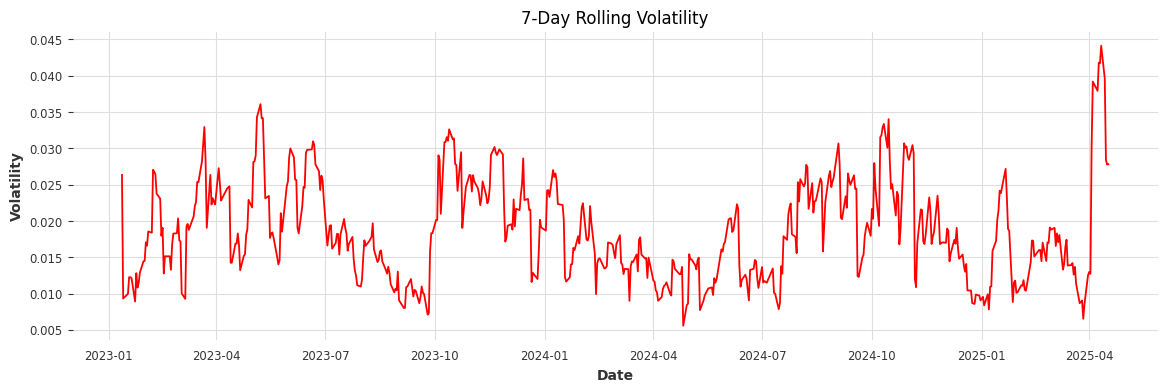

In [573]:
filter_df['Volatility_7'] = filter_df['Return'].rolling(window=7).std()

plt.figure(figsize=(14,4))
plt.plot(filter_df['Volatility_7'], color='red')
plt.title('7-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()


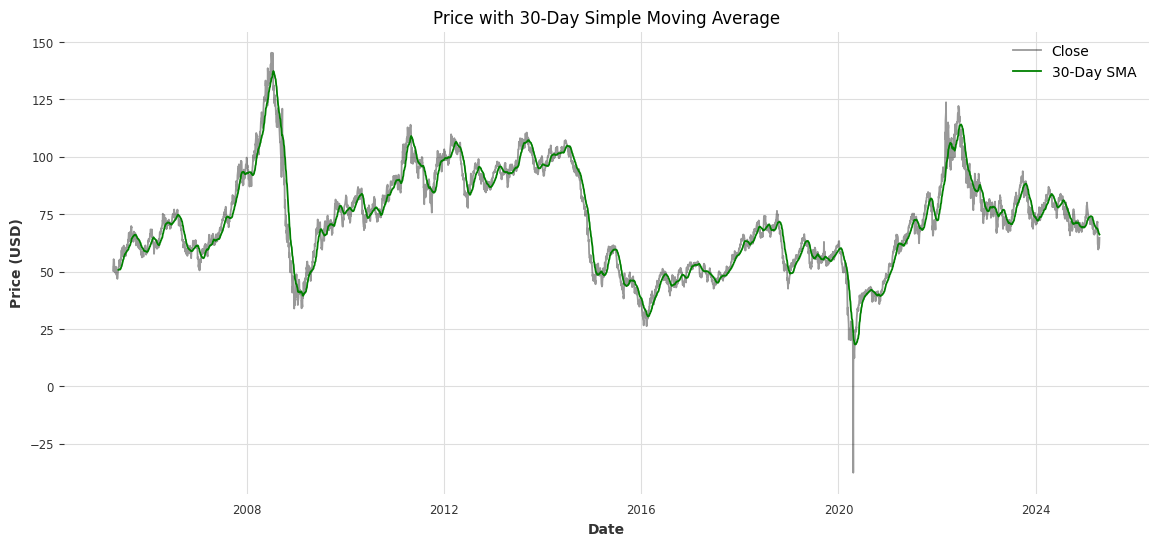

In [574]:
df['SMA_30'] = df['Close'].rolling(window=30).mean()

plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Close', alpha=0.4)
plt.plot(df['SMA_30'], label='30-Day SMA', color='green')
plt.title('Price with 30-Day Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()



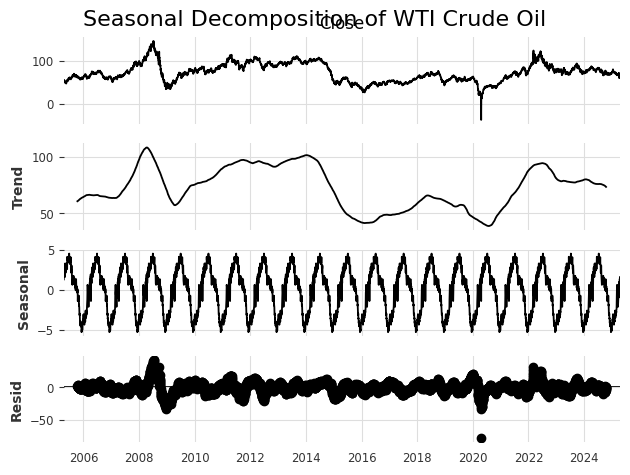

In [575]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(df['Close'], model='additive', period=252)  # ~1 trading year
decomp.plot()
plt.suptitle("Seasonal Decomposition of WTI Crude Oil", fontsize=16)
plt.show()


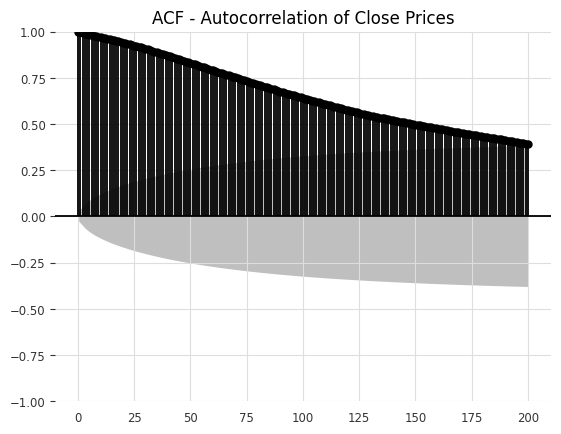

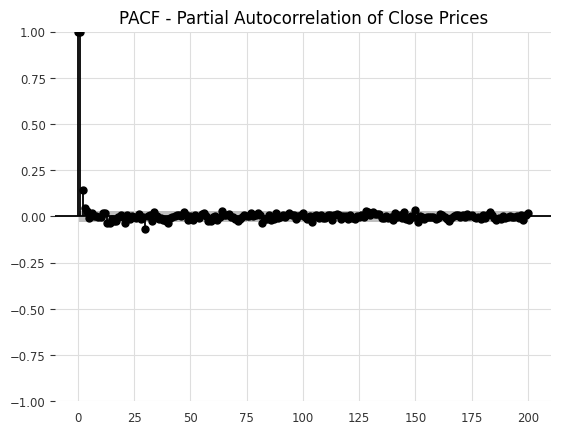

In [576]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Close'].dropna(), lags=200)
plt.title("ACF - Autocorrelation of Close Prices")
plt.show()

plot_pacf(df['Close'].dropna(), lags=200)
plt.title("PACF - Partial Autocorrelation of Close Prices")
plt.show()


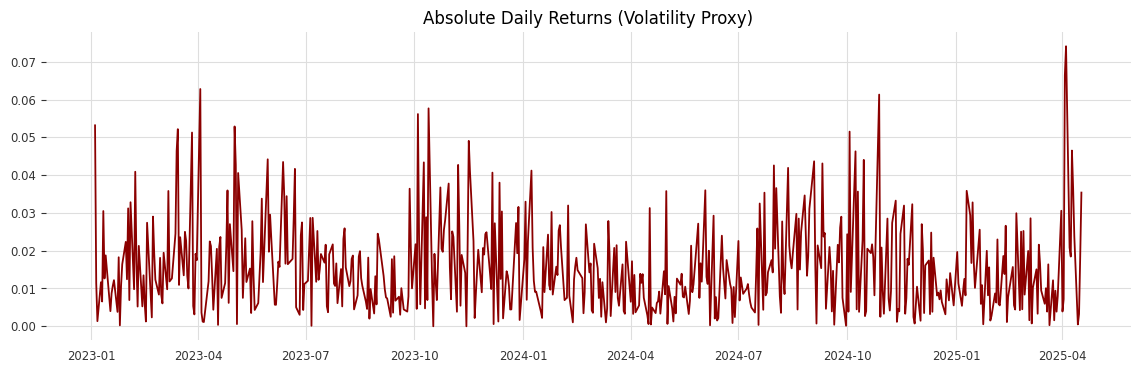

In [577]:
df['Abs_Return'] = filter_df['Return'].abs()

plt.figure(figsize=(14, 4))
plt.plot(df['Abs_Return'], color='darkred')
plt.title('Absolute Daily Returns (Volatility Proxy)')
plt.grid(True)
plt.show()


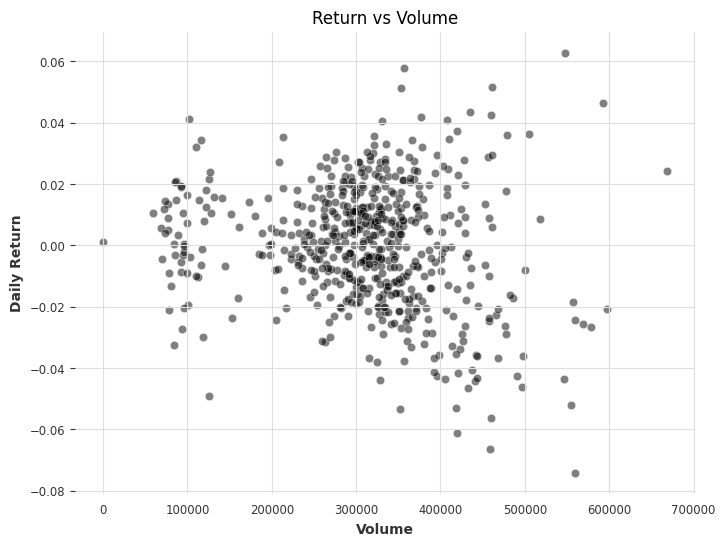

Correlation between Returns and Volume: -0.1588


In [578]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=filter_df['Volume'], y=filter_df['Return'], alpha=0.5)
plt.title("Return vs Volume")
plt.xlabel("Volume")
plt.ylabel("Daily Return")
plt.grid(True)
plt.show()

# Correlation coefficient
correlation =  filter_df[['Return', 'Volume']].corr().iloc[0, 1]
print(f"Correlation between Returns and Volume: {correlation:.4f}")


/var/folders/0w/c3kpnktn3s39bj857lm6hgc00000gn/T/ipykernel_50167/840936617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_df['SMA_20'] = filter_df['Close'].rolling(20).mean()
/var/folders/0w/c3kpnktn3s39bj857lm6hgc00000gn/T/ipykernel_50167/840936617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_df['SMA_100'] = filter_df['Close'].rolling(100).mean()


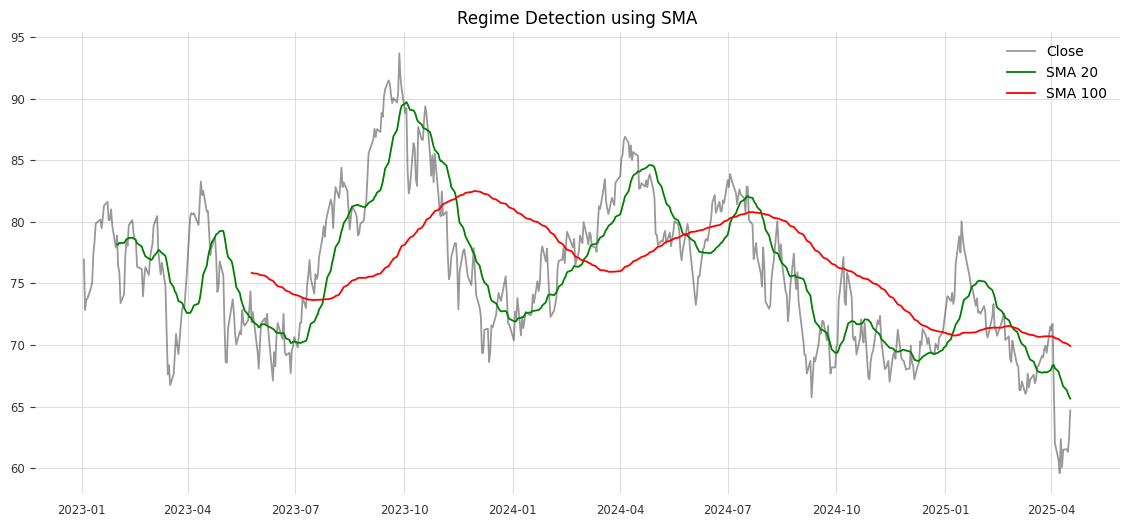

In [579]:
filter_df['SMA_20'] = filter_df['Close'].rolling(20).mean()
filter_df['SMA_100'] = filter_df['Close'].rolling(100).mean()

plt.figure(figsize=(14,6))
plt.plot(filter_df['Close'], label='Close', alpha=0.4)
plt.plot(filter_df['SMA_20'], label='SMA 20', color='green')
plt.plot(filter_df['SMA_100'], label='SMA 100', color='red')
plt.legend()
plt.title('Regime Detection using SMA')
plt.grid(True)
plt.show()


### Train_Test Split

In [584]:
train = filter_df.loc[:'2025-03-10']
test = filter_df.loc['2025-03-10':]


In [677]:
train_7 = filter_df.loc[:'2025-04-13']
test_7 = filter_df.loc['2025-04-13':]

In [585]:
train
test

,Close,High,Low,Open,Volume,SMA_30,Abs_Return,Return,Volatility_7,SMA_20,SMA_100
Date,,,,,,,,,,,
2025-03-10,66.029999,67.599998,65.800003,67.110001,249633,70.672000,0.015066,-0.015066,0.013289,69.842000,70.9564
2025-03-11,66.250000,67.169998,65.290001,65.949997,222511,70.441334,0.003332,0.003332,0.014084,69.538500,70.9131
2025-03-12,67.680000,67.879997,66.150002,66.620003,246675,70.238334,0.021585,0.021585,0.016410,69.256500,70.8860
2025-03-13,66.550003,67.940002,66.370003,67.690002,268590,70.036000,0.016696,-0.016696,0.017413,69.015500,70.8448
2025-03-14,67.180000,67.480003,66.589996,66.779999,180495,69.851000,0.009467,0.009467,0.013853,68.810000,70.8244
2025-03-17,67.580002,68.370003,67.250000,67.349998,161298,69.686000,0.005954,0.005954,0.013918,68.652000,70.7946
2025-03-18,66.900002,68.720001,66.559998,67.400002,110338,69.477334,0.010062,-0.010062,0.014194,68.404501,70.7427
2025-03-19,67.160004,67.629997,66.209999,66.720001,73077,69.292667,0.003886,0.003886,0.012607,68.150001,70.7066
2025-03-20,68.260002,68.470001,66.879997,67.290001,283376,69.200334,0.016379,0.016379,0.013671,67.934501,70.6873


In [586]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train['Close'].dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -2.8075251796948586
p-value: 0.057206863752421185


Since p<0.5 the timeseries data is stationary

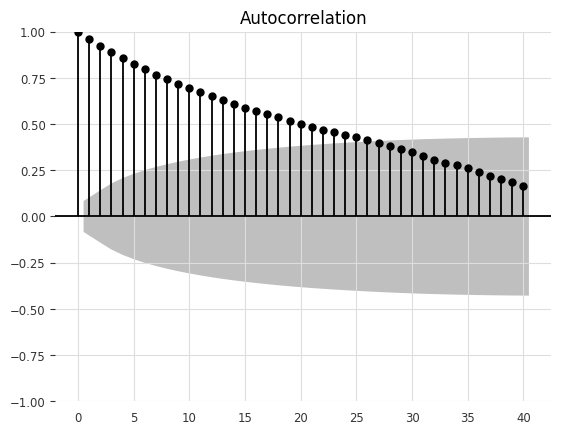

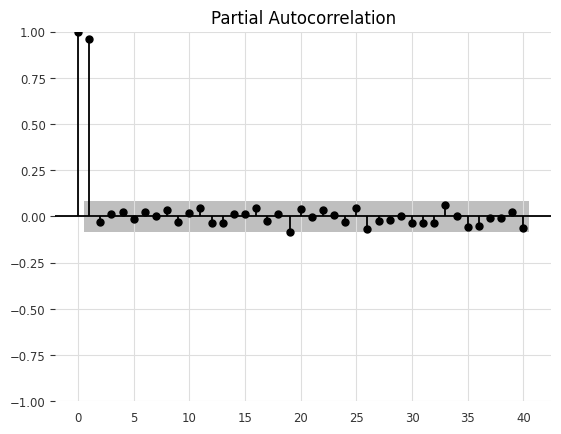

In [587]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(train['Close'].dropna(), lags=40)
plot_pacf(train['Close'].dropna(), lags=40)
plt.show()


In [588]:
from statsmodels.tsa.arima.model import ARIMA

model1 = ARIMA(train['Close'], order=(2,0,0)).fit()
model2 = ARIMA(train['Close'], order=(3,1,3)).fit()

print("ARIMA(2,0,0) AIC:", model1.aic)
print("ARIMA(2,1,1) AIC:", model2.aic)


/Users/sumitkumar/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sumitkumar/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sumitkumar/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sumitkumar/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so wil

ARIMA(2,0,0) AIC: 1982.244766462616
ARIMA(2,1,1) AIC: 1976.4536205841723


/Users/sumitkumar/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [589]:
forecast_ARIMA = model2.forecast(steps=len(test))
forecast_ARIMA = forecast_ARIMA.iloc[:len(test)]  # Trim just in case
forecast_ARIMA.index = test.index


/Users/sumitkumar/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/sumitkumar/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [681]:
forecast_ARIMA_7 = model2.forecast(steps=len(test_7))
forecast_ARIMA_7 = forecast_ARIMA.iloc[:len(test_7)]  # Trim just in case
forecast_ARIMA_7.index = test_7.index

/Users/sumitkumar/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/sumitkumar/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [591]:

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test['Close'], forecast_ARIMA))
mae = mean_absolute_error(test['Close'], forecast_ARIMA)

print(f"ARIMA  RMSE: {rmse:.4f}")
print(f"ARIMA  MAE: {mae:.4f}")


ARIMA  RMSE: 5.6839
ARIMA  MAE: 3.7553


In [683]:

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test_7['Close'], forecast_ARIMA_7))
mae = mean_absolute_error(test_7['Close'], forecast_ARIMA_7)

print(f"ARIMA  RMSE: {rmse:.4f}")
print(f"ARIMA  MAE: {mae:.4f}")

ARIMA  RMSE: 4.3317
ARIMA  MAE: 4.2049


In [433]:
train

,Close,High,Low,Open,Volume,Return,Volatility_7,SMA_20,SMA_100
Date,,,,,,,,,
2023-01-03,76.930000,81.500000,76.599998,80.570000,338520,NaN,NaN,NaN,NaN
2023-01-04,72.839996,77.419998,72.730003,77.250000,352434,-0.053165,NaN,NaN,NaN
2023-01-05,73.669998,74.919998,72.459999,73.250000,300731,0.011395,NaN,NaN,NaN
2023-01-06,73.769997,75.470001,73.239998,73.970001,258128,0.001357,NaN,NaN,NaN
2023-01-09,74.629997,76.739998,73.470001,73.470001,329290,0.011658,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2025-04-02,71.709999,72.279999,70.589996,71.199997,286501,0.007163,0.012717,68.335001,70.6956
2025-04-03,66.949997,70.410004,65.980003,70.379997,459238,-0.066378,0.030190,68.364500,70.6415
2025-04-04,61.990002,66.900002,60.450001,66.639999,559638,-0.074085,0.039203,68.112000,70.5576


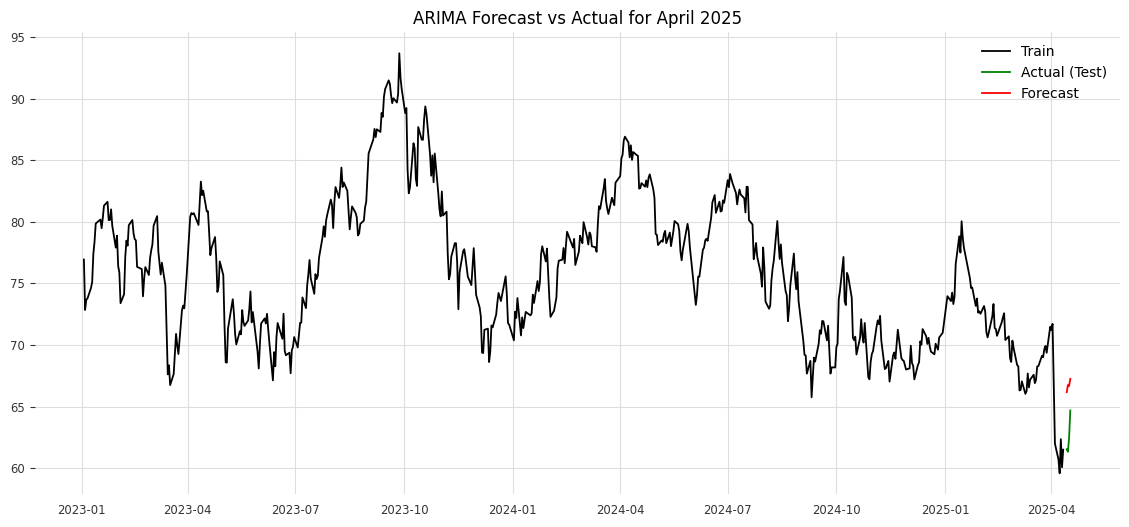

In [684]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(train_7['Close'], label='Train')
plt.plot(test_7['Close'], label='Actual (Test)', color='green')
plt.plot(forecast_ARIMA_7, label='Forecast', color='red')
plt.title("ARIMA Forecast vs Actual for April 2025")
plt.legend()
plt.grid(True)
plt.show()


In [594]:
from prophet import Prophet

# Prophet needs columns: ds (date), y (value to predict)
df_prophet = filter_df[['Close']].copy()
df_prophet = df_prophet.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})


In [595]:
df_prophet

,ds,y
0,2023-01-03,76.930000
1,2023-01-04,72.839996
2,2023-01-05,73.669998
3,2023-01-06,73.769997
4,2023-01-09,74.629997
...,...,...
571,2025-04-11,61.500000
572,2025-04-14,61.529999
573,2025-04-15,61.330002
574,2025-04-16,62.470001


In [596]:
train = df_prophet[(df_prophet['ds'] >= '2023-01-02') & (df_prophet['ds'] <= '2025-03-15')]
test = df_prophet[(df_prophet['ds'] >= '2025-03-15') & (df_prophet['ds'] <= '2025-04-14')]


In [686]:
train_7 = df_prophet[(df_prophet['ds'] >= '2023-01-02') & (df_prophet['ds'] <= '2025-04-13')]
test_7 = df_prophet[(df_prophet['ds'] >= '2025-04-13') & (df_prophet['ds'] <= '2025-04-21')]

In [597]:
m = Prophet(daily_seasonality=True)
m.fit(train)


17:14:40 - cmdstanpy - INFO - Chain [1] start processing
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
17:14:40 - cmdstanpy - INFO - Chain [1] done processing


In [687]:
m_7 = Prophet(daily_seasonality=True)
m_7.fit(train_7)


17:47:10 - cmdstanpy - INFO - Chain [1] start processing
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
17:47:10 - cmdstanpy - INFO - Chain [1] done processing


In [688]:
future_7 = m_7.make_future_dataframe(periods=len(test_7),freq='B')
forecast_7 = m_7.predict(future_7)


In [ ]:
future = m.make_future_dataframe(periods=len(test),freq='B')
forecast = m.predict(future)


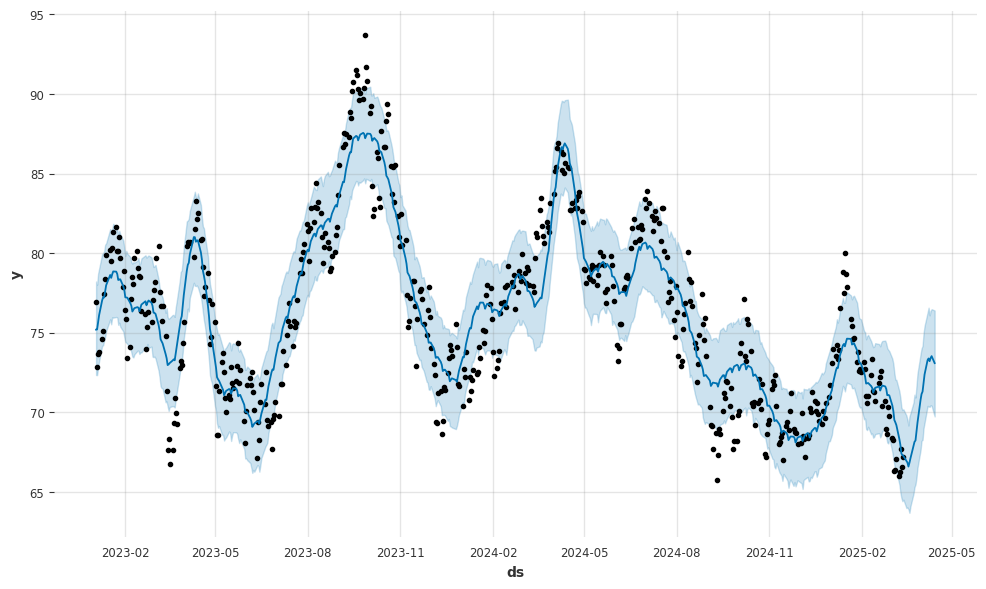

In [599]:
fig = m.plot(forecast)


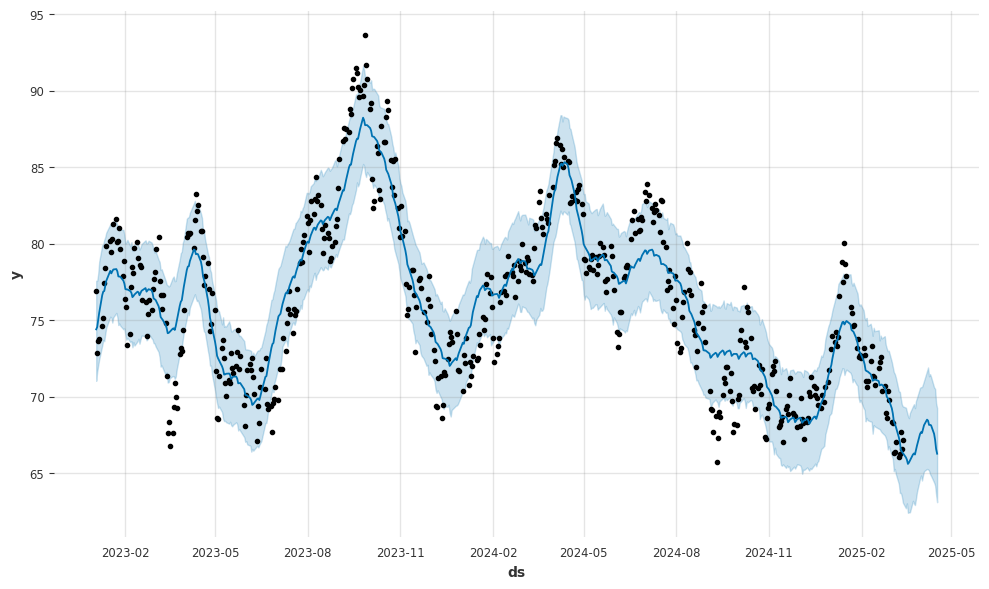

In [689]:
fig_7 = m.plot(forecast_7)

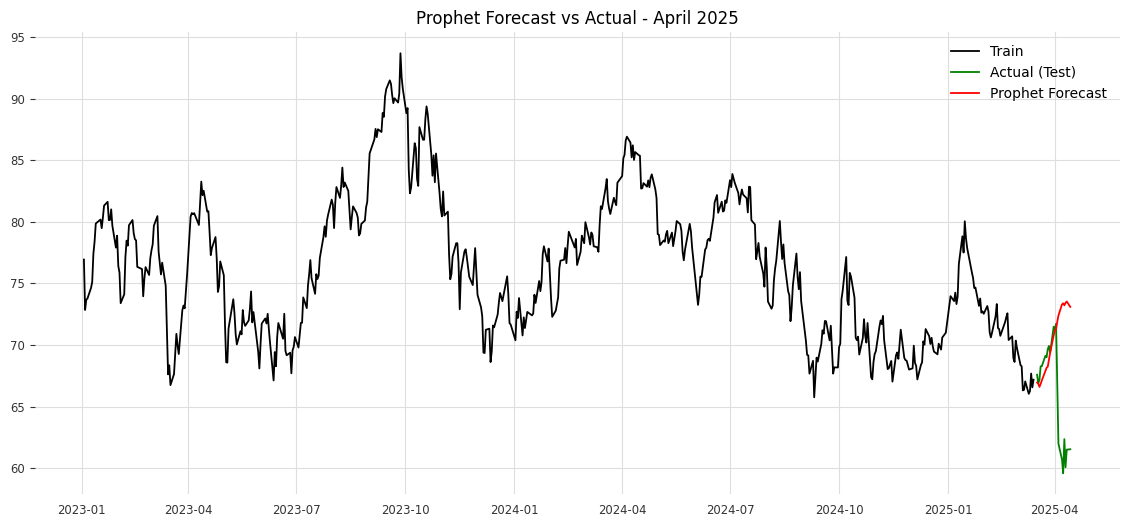

In [600]:
# Merge actual test with forecast by date
forecast_trimmed = forecast[['ds', 'yhat']]
merged = test.merge(forecast_trimmed, on='ds', how='left')  # avoids index error
plt.figure(figsize=(14,6))
plt.plot(train['ds'], train['y'], label='Train')
plt.plot(merged['ds'], merged['y'], label='Actual (Test)', color='green')
plt.plot(merged['ds'], merged['yhat'], label='Prophet Forecast', color='red')
plt.legend()
plt.grid(True)
plt.title("Prophet Forecast vs Actual - April 2025")
plt.show()


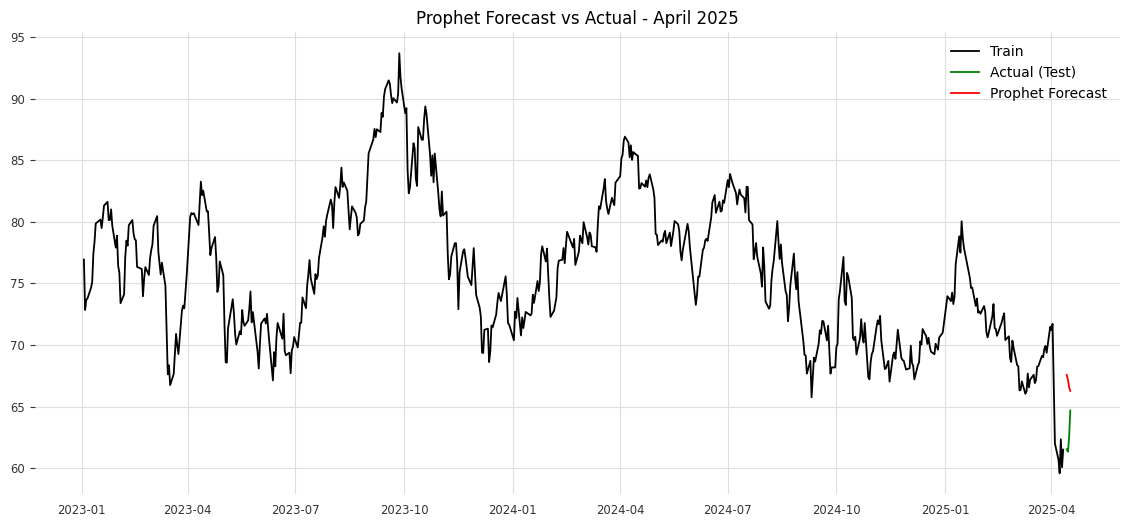

In [690]:
# Merge actual test with forecast by date
forecast_trimmed = forecast_7[['ds', 'yhat']]
merged_7 = test_7.merge(forecast_trimmed, on='ds', how='left')  # avoids index error
plt.figure(figsize=(14,6))
plt.plot(train_7['ds'], train_7['y'], label='Train')
plt.plot(merged_7['ds'], merged_7['y'], label='Actual (Test)', color='green')
plt.plot(merged_7['ds'], merged_7['yhat'], label='Prophet Forecast', color='red')
plt.legend()
plt.grid(True)
plt.title("Prophet Forecast vs Actual - April 2025")
plt.show()

In [601]:
merged

,ds,y,yhat
0,2025-03-17,67.580002,66.943706
1,2025-03-18,66.900002,66.846268
2,2025-03-19,67.160004,66.594558
3,2025-03-20,68.260002,66.833787
4,2025-03-21,68.279999,67.114192
5,2025-03-24,69.110001,67.884006
6,2025-03-25,69.000000,68.144062
7,2025-03-26,69.650002,68.235115
8,2025-03-27,69.919998,68.795033
9,2025-03-28,69.360001,69.366996


In [602]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
eval_df = merged.dropna(subset=['y', 'yhat'])
rmse = mean_squared_error(eval_df['y'], eval_df['yhat'], squared=False)
mae = mean_absolute_error(eval_df['y'], eval_df['yhat'])

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


RMSE: 7.1243
MAE: 4.7208


In [691]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
eval_df = merged_7.dropna(subset=['y', 'yhat'])
rmse = mean_squared_error(eval_df['y'], eval_df['yhat'], squared=False)
mae = mean_absolute_error(eval_df['y'], eval_df['yhat'])

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


RMSE: 4.7421
MAE: 4.3930


Monte Carlo

### Above were Statistical Technique, Below are ML/DL Technique for Timeseries Forecasting

In [739]:
filter_df

,Close,High,Low,Open,Volume,SMA_30,Abs_Return,Return,Volatility_7,SMA_20,SMA_100
Date,,,,,,,,,,,
2023-01-03,76.930000,81.500000,76.599998,80.570000,338520,77.159333,NaN,NaN,NaN,NaN,NaN
2023-01-04,72.839996,77.419998,72.730003,77.250000,352434,76.918000,0.053165,-0.053165,NaN,NaN,NaN
2023-01-05,73.669998,74.919998,72.459999,73.250000,300731,76.716000,0.011395,0.011395,NaN,NaN,NaN
2023-01-06,73.769997,75.470001,73.239998,73.970001,258128,76.476666,0.001357,0.001357,NaN,NaN,NaN
2023-01-09,74.629997,76.739998,73.470001,73.470001,329290,76.366333,0.011658,0.011658,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2025-04-11,61.500000,61.869999,59.430000,60.200001,306231,66.759334,0.023806,0.023806,0.044137,66.6375,70.1965
2025-04-14,61.529999,62.680000,60.590000,61.700001,238068,66.531334,0.000488,0.000488,0.039651,66.3350,70.1202
2025-04-15,61.330002,62.060001,60.880001,61.580002,197404,66.300334,0.003250,-0.003250,0.028402,66.0565,70.0396


In [603]:
df_ml = filter_df.copy()

In [740]:
df_ml = filter_df.copy()

# Lag features (yesterday, day before, etc.)
df_ml['lag_1'] = df_ml['Close'].shift(1)
df_ml['lag_2'] = df_ml['Close'].shift(2)
df_ml['lag_3'] = df_ml['Close'].shift(3)

# Rolling mean (past 5-day average)
df_ml['rolling_mean_5'] = df_ml['Close'].rolling(window=5).mean()

# Daily returns
df_ml['return_1'] = df_ml['Close'].pct_change(1)

# Drop rows with NaNs
df_ml.dropna(inplace=True)


In [693]:
df_ml_7 = filter_df.copy()

# Lag features (yesterday, day before, etc.)
df_ml_7['lag_1'] = df_ml_7['Close'].shift(1)
df_ml_7['lag_2'] = df_ml_7['Close'].shift(2)
df_ml_7['lag_3'] = df_ml_7['Close'].shift(3)

# Rolling mean (past 5-day average)
df_ml_7['rolling_mean_5'] = df_ml_7['Close'].rolling(window=5).mean()

# Daily returns
df_ml_7['return_1'] = df_ml_7['Close'].pct_change(1)

# Drop rows with NaNs
df_ml_7.dropna(inplace=True)

In [605]:
# Features for ML
features = ['lag_1', 'lag_2', 'lag_3', 'rolling_mean_5', 'return_1']
X = df_ml[features]
y = df_ml['Close']


In [695]:
# Features for ML
features = ['lag_1', 'lag_2', 'lag_3', 'rolling_mean_5', 'return_1']
X_7 = df_ml_7[features]
y_7 = df_ml_7['Close']


In [606]:
from sklearn.model_selection import train_test_split

X_train, X_test = X[:-30], X[-30:]
y_train, y_test = y[:-30], y[-30:]


In [701]:
from sklearn.model_selection import train_test_split

X_train_7, X_test_7 = X_7[:-7], X_7[-7:]
y_train_7, y_test_7 = y_7[:-7], y_7[-7:]


In [607]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


In [702]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_7, y_train_7)

y_pred_7 = rf.predict(X_test_7)


In [608]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Random Forest RMSE: {rmse:.4f}")
print(f"Random Forest MAE: {mae:.4f}")


Random Forest RMSE: 3.4510
Random Forest MAE: 2.2678


In [703]:
rmse = np.sqrt(mean_squared_error(y_test_7, y_pred_7))
mae = mean_absolute_error(y_test_7, y_pred_7)

print(f"Random Forest RMSE: {rmse:.4f}")
print(f"Random Forest MAE: {mae:.4f}")

Random Forest RMSE: 1.6108
Random Forest MAE: 1.5400


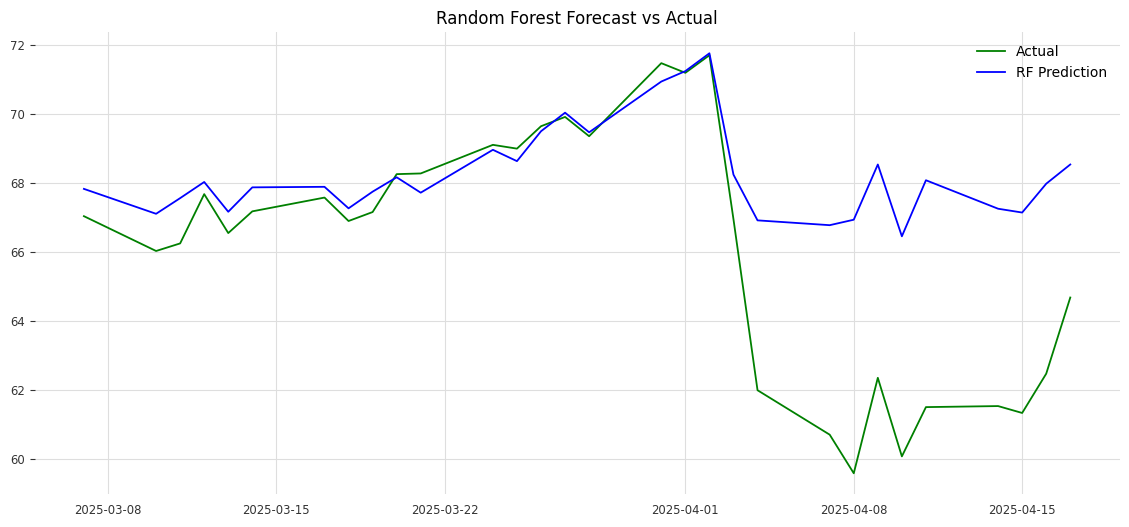

In [609]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(y_test.index, y_test.values, label='Actual', color='green')
plt.plot(y_test.index, y_pred, label='RF Prediction', color='blue')
plt.title("Random Forest Forecast vs Actual")
plt.legend()
plt.grid(True)
plt.show()


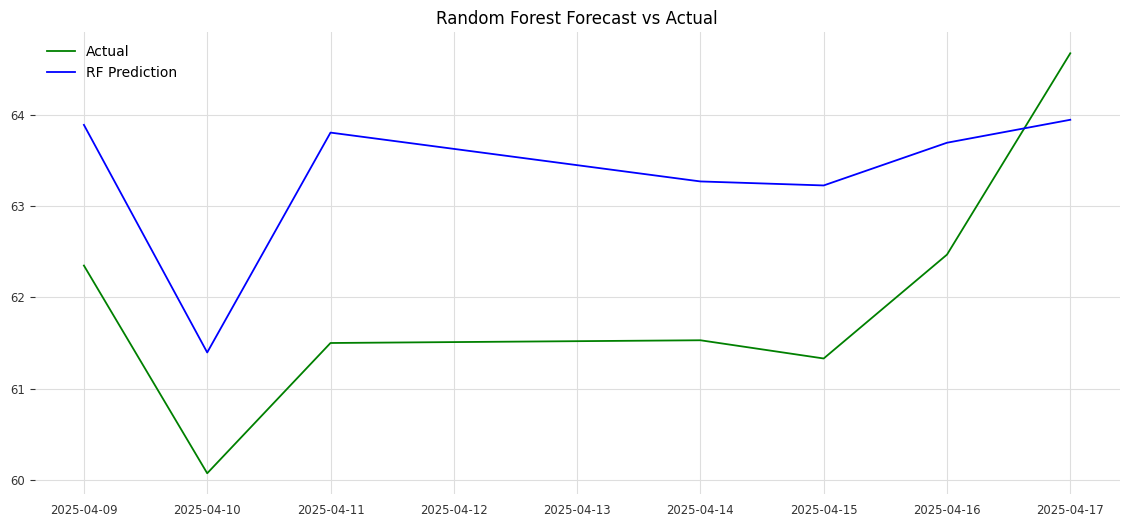

In [704]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(y_test_7.index, y_test_7.values, label='Actual', color='green')
plt.plot(y_test_7.index, y_pred_7, label='RF Prediction', color='blue')
plt.title("Random Forest Forecast vs Actual")
plt.legend()
plt.grid(True)
plt.show()


In [610]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Initialize model
xgb = XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)

# Train
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test)


In [706]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Initialize model
xgb = XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)

# Train
xgb.fit(X_train_7, y_train_7)

# Predict
y_pred_xgb_7 = xgb.predict(X_test_7)


In [612]:
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print(f"XGBoost RMSE: {rmse_xgb:.4f}")
print(f"XGBoost MAE: {mae_xgb:.4f}")


XGBoost RMSE: 3.5553
XGBoost MAE: 2.2965


In [707]:
rmse_xgb = np.sqrt(mean_squared_error(y_test_7, y_pred_xgb_7))
mae_xgb = mean_absolute_error(y_test_7, y_pred_xgb_7)

print(f"XGBoost RMSE: {rmse_xgb:.4f}")
print(f"XGBoost MAE: {mae_xgb:.4f}")

XGBoost RMSE: 3.5162
XGBoost MAE: 3.1531


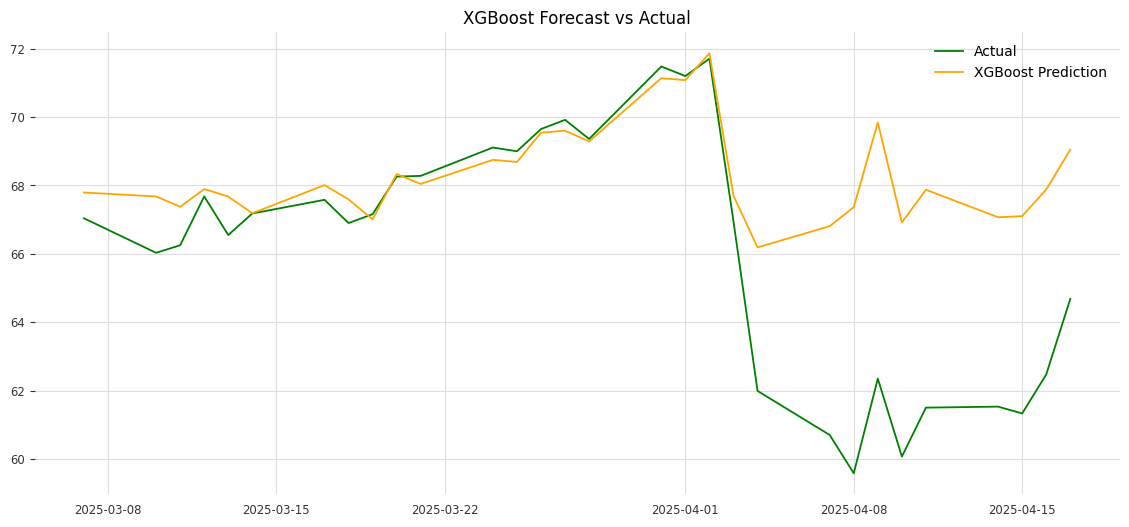

In [613]:
plt.figure(figsize=(14,6))
plt.plot(y_test.index, y_test.values, label='Actual', color='green')
plt.plot(y_test.index, y_pred_xgb, label='XGBoost Prediction', color='orange')
plt.title("XGBoost Forecast vs Actual")
plt.legend()
plt.grid(True)
plt.show()


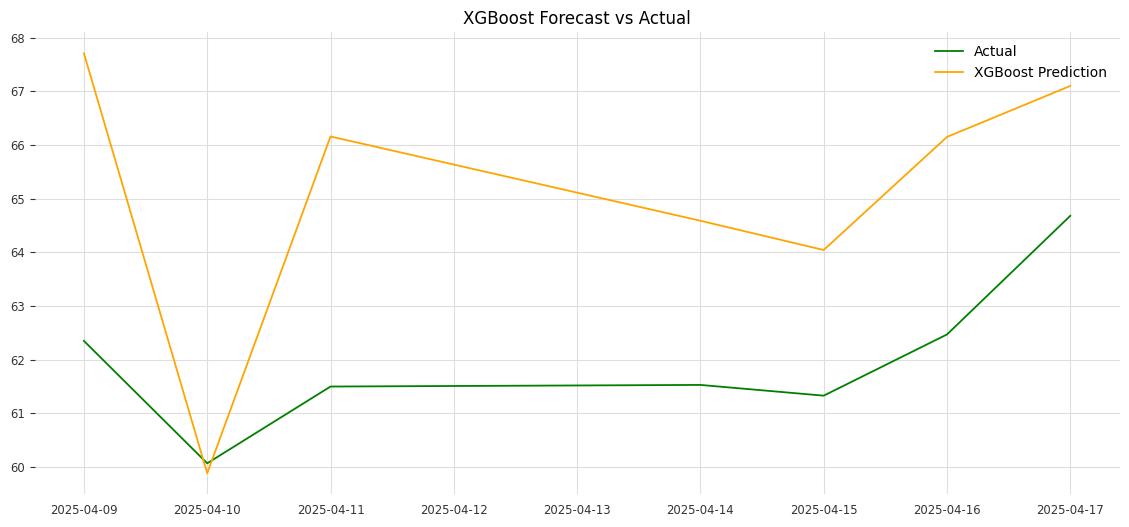

In [708]:
plt.figure(figsize=(14,6))
plt.plot(y_test_7.index, y_test_7.values, label='Actual', color='green')
plt.plot(y_test_7.index, y_pred_xgb_7, label='XGBoost Prediction', color='orange')
plt.title("XGBoost Forecast vs Actual")
plt.legend()
plt.grid(True)
plt.show()


In [614]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Scale prices between 0 and 1
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(filter_df[['Close']].values)

# Create sequences
def create_sequences(data, window_size=10):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

X_all, y_all = create_sequences(scaled_close, window_size=10)


In [615]:
X_all.shape

(566, 10, 1)

In [616]:
# Last 30 days = test
split = -30
X_train, X_test = X_all[:split], X_all[split:]
y_train, y_test = y_all[:split], y_all[split:]


In [709]:
# Last 30 days = test
split = -7
X_train_7, X_test_7 = X_all[:split], X_all[split:]
y_train_7, y_test_7 = y_all[:split], y_all[split:]


In [617]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1)


/Users/sumitkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1905
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0057
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0049
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0044
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0042
Epoch 9/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043
Epoch 10/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036
Epoch 11/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040
Epoch 12/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0037
Epoch 13/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0040
Epoch 14/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0036
Epoch 15/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0036
Epoch 16/20
34/

In [710]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train_7.shape[1], 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train_7, y_train_7, epochs=20, batch_size=16, verbose=1)


/Users/sumitkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1942
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0101
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0049
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0059
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0048
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0044
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0045
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0044
Epoch 9/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0051
Epoch 10/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0040
Epoch 11/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0043
Epoch 12/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0040
Epoch 13/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0040
Epoch 14/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0040
Epoch 15/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0038
Epoch 16/20
35/35 ━

In [618]:
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


In [711]:
y_pred_7 = model.predict(X_test_7)
y_pred_rescaled_7 = scaler.inverse_transform(y_pred_7)
y_test_rescaled_7 = scaler.inverse_transform(y_test_7)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


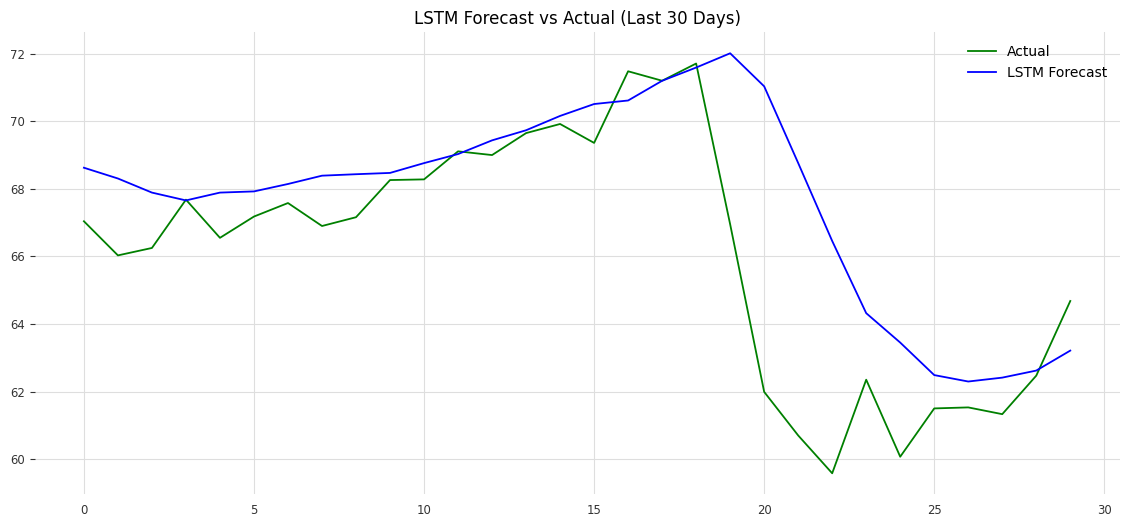

LSTM RMSE: 2.9409
LSTM MAE: 1.7817


In [619]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

plt.figure(figsize=(14,6))
plt.plot(y_test_rescaled, label='Actual', color='green')
plt.plot(y_pred_rescaled, label='LSTM Forecast', color='blue')
plt.legend()
plt.title("LSTM Forecast vs Actual (Last 30 Days)")
plt.grid(True)
plt.show()

rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
print(f"LSTM RMSE: {rmse:.4f}")
print(f"LSTM MAE: {mae:.4f}")


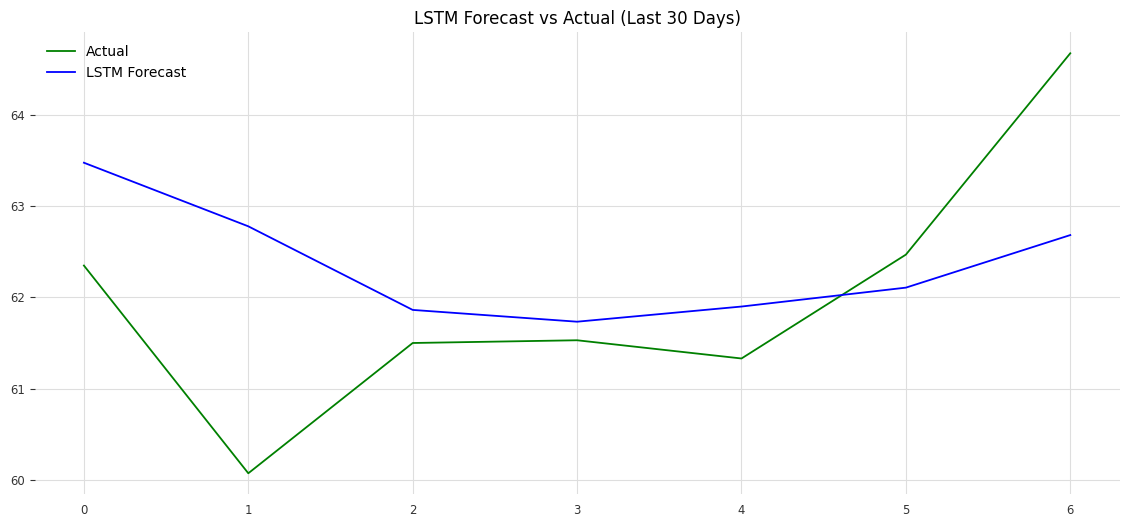

LSTM RMSE: 1.3749
LSTM MAE: 1.0477


In [712]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

plt.figure(figsize=(14,6))
plt.plot(y_test_rescaled_7, label='Actual', color='green')
plt.plot(y_pred_rescaled_7, label='LSTM Forecast', color='blue')
plt.legend()
plt.title("LSTM Forecast vs Actual (Last 30 Days)")
plt.grid(True)
plt.show()

rmse = np.sqrt(mean_squared_error(y_test_rescaled_7, y_pred_rescaled_7))
mae = mean_absolute_error(y_test_rescaled_7, y_pred_rescaled_7)
print(f"LSTM RMSE: {rmse:.4f}")
print(f"LSTM MAE: {mae:.4f}")


### Now for LSTM we will do Finetuning and Feature Injection to make it better

In [620]:
df_lstm = filter_df.copy()

# Lag features
df_lstm['lag_1'] = df_lstm['Close'].shift(1)
df_lstm['lag_2'] = df_lstm['Close'].shift(2)
df_lstm['lag_3'] = df_lstm['Close'].shift(3)

# Technical indicators
df_lstm['rolling_mean_7'] = df_lstm['Close'].rolling(7).mean()
df_lstm['return_1'] = df_lstm['Close'].pct_change(1)
df_lstm['roc_3'] = df_lstm['Close'].pct_change(3)
df_lstm['volume_scaled'] = MinMaxScaler().fit_transform(df_lstm[['Volume']])

# Drop missing values
df_lstm.dropna(inplace=True)


In [621]:
features = ['Close']
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_lstm[features])


In [622]:
def create_multivariate_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size, 0])  # target is 'Close'
    return np.array(X), np.array(y)

window_size = 10
X, y = create_multivariate_sequences(scaled, window_size)


In [623]:
X_train, X_test = X[:-30], X[-30:]
y_train, y_test = y[:-30], y[-30:]


In [713]:
X_train_7, X_test_7 = X[:-7], X[-7:]
y_train_7, y_test_7 = y[:-7], y[-7:]


In [624]:
len(X_train)

437

In [625]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(42, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.4),
    
    LSTM(21, activation='relu'),
    Dropout(0.3),
 

    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Optional: Early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='loss', patience=5)

model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1, callbacks=[early_stop])


/Users/sumitkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2570
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0423
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0286
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0328
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0210
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0242
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0206
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0190
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0230
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0225
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0193
Epoch 12/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0189
Epoch 13/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0154
Epoch 14/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0166
Epoch 15/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0155
Epoch 16/50
28/28 ━

In [714]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(42, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.4),
    
    LSTM(21, activation='relu'),
    Dropout(0.3),
 

    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Optional: Early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='loss', patience=5)

model.fit(X_train_7, y_train_7, epochs=50, batch_size=16, verbose=1, callbacks=[early_stop])


Epoch 1/50


/Users/sumitkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1973
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0322
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0270
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0200
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0210
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0183
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0154
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0167
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0176
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0192
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0188
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0173
Epoch 13/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0182
Epoch 14/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0169
Epoch 15/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0157
Epoch 16/50
24/

In [626]:
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(np.concatenate((y_pred, X_test[:, -1, 1:]), axis=1))[:, 0]
y_test_rescaled = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


In [715]:
y_pred_7 = model.predict(X_test_7)
y_pred_rescaled_7 = scaler.inverse_transform(np.concatenate((y_pred_7, X_test_7[:, -1, 1:]), axis=1))[:, 0]
y_test_rescaled_7 = scaler.inverse_transform(np.concatenate((y_test_7.reshape(-1, 1), X_test_7[:, -1, 1:]), axis=1))[:, 0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Improved LSTM RMSE: 5.3972
Improved LSTM MAE: 4.1798


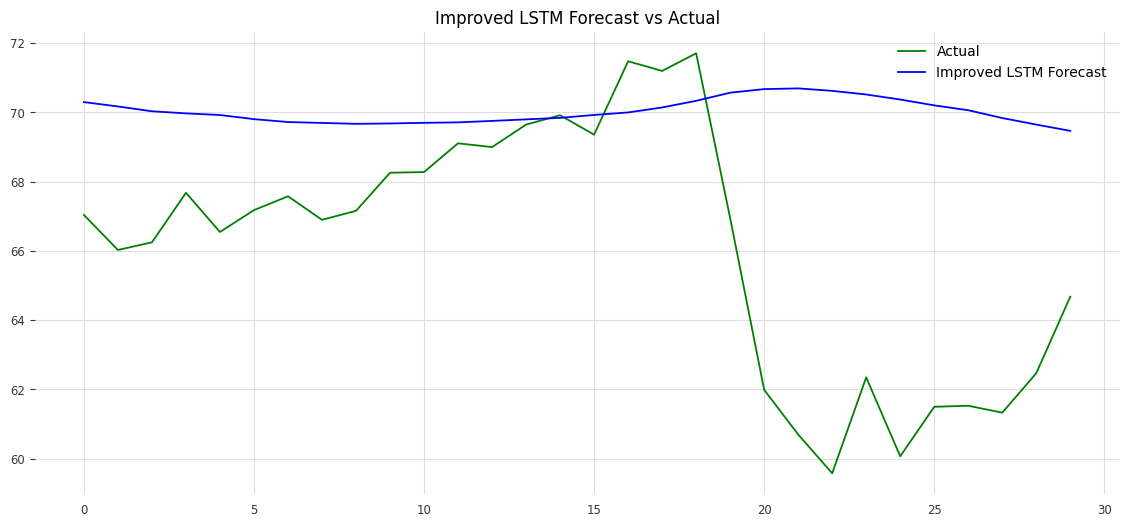

In [627]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)

print(f"Improved LSTM RMSE: {rmse:.4f}")
print(f"Improved LSTM MAE: {mae:.4f}")

plt.figure(figsize=(14,6))
plt.plot(y_test_rescaled, label='Actual', color='green')
plt.plot(y_pred_rescaled, label='Improved LSTM Forecast', color='blue')
plt.title("Improved LSTM Forecast vs Actual")
plt.legend()
plt.grid(True)
plt.show()


Improved LSTM RMSE: 2.6522
Improved LSTM MAE: 2.3737


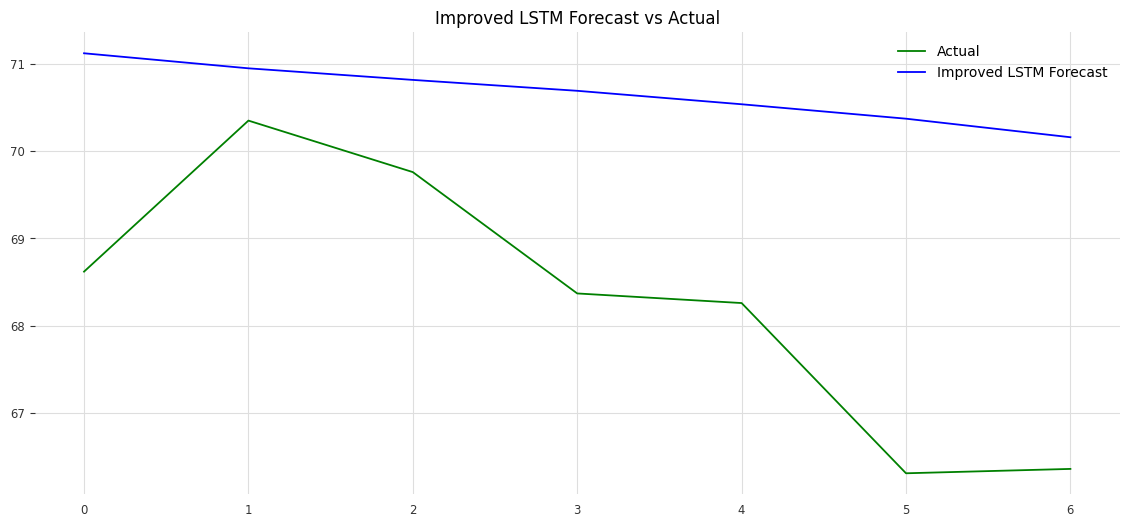

In [716]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

rmse = np.sqrt(mean_squared_error(y_test_rescaled_7, y_pred_rescaled_7))
mae = mean_absolute_error(y_test_rescaled_7, y_pred_rescaled_7)

print(f"Improved LSTM RMSE: {rmse:.4f}")
print(f"Improved LSTM MAE: {mae:.4f}")

plt.figure(figsize=(14,6))
plt.plot(y_test_rescaled_7, label='Actual', color='green')
plt.plot(y_pred_rescaled_7, label='Improved LSTM Forecast', color='blue')
plt.title("Improved LSTM Forecast vs Actual")
plt.legend()
plt.grid(True)
plt.show()


In [213]:
import requests
import pandas as pd
from datetime import datetime, timedelta

API_KEY = '86f457d72c1440c782f97eca67345c6a'
BASE_URL = 'https://newsapi.org/v2/everything'

query = 'oil OR crude oil OR OPEC'
end_date = datetime.today()
start_date = end_date - timedelta(days=50)

news_data = []

for i in range(100):
    date = end_date - timedelta(days=i)
    params = {
        'q': query,
        'from': date.strftime('%Y-%m-%d'),
        'to': date.strftime('%Y-%m-%d'),
        'language': 'en',
        'sortBy': 'relevancy',
        'apiKey': API_KEY,
        'pageSize': 100,
    }
    try:
        response = requests.get(BASE_URL, params=params).json()
        print(f"{date.date()} - {len(response.get('articles', []))} articles")
        for article in response.get('articles', []):
            news_data.append({
                'date': date.date(),
                'title': article['title']
            })
    except Exception as e:
        print(f"Error on {date.date()}: {e}")

news_df2 = pd.DataFrame(news_data)

print("Saved latest 50 days' news to CSV.")


2025-04-19 - 100 articles
2025-04-18 - 97 articles
2025-04-17 - 99 articles
2025-04-16 - 97 articles
2025-04-15 - 99 articles
2025-04-14 - 96 articles
2025-04-13 - 98 articles
2025-04-12 - 97 articles
2025-04-11 - 97 articles
2025-04-10 - 99 articles
2025-04-09 - 99 articles
2025-04-08 - 98 articles
2025-04-07 - 96 articles
2025-04-06 - 97 articles
2025-04-05 - 99 articles
2025-04-04 - 96 articles
2025-04-03 - 99 articles
2025-04-02 - 100 articles
2025-04-01 - 99 articles
2025-03-31 - 96 articles
2025-03-30 - 96 articles
2025-03-29 - 100 articles
2025-03-28 - 94 articles
2025-03-27 - 98 articles
2025-03-26 - 99 articles
2025-03-25 - 97 articles
2025-03-24 - 98 articles
2025-03-23 - 98 articles
2025-03-22 - 99 articles
2025-03-21 - 96 articles
2025-03-20 - 99 articles
2025-03-19 - 0 articles
2025-03-18 - 0 articles
2025-03-17 - 0 articles
2025-03-16 - 0 articles
2025-03-15 - 0 articles
2025-03-14 - 0 articles
2025-03-13 - 0 articles
2025-03-12 - 0 articles
2025-03-11 - 0 articles
2025-0

In [119]:
news_df2

,date,title
0,2025-04-18,There’s a Climate Showdown Ahead for Big Oil I...
1,2025-04-18,Trump Tariffs Hit Oil Companies despite Admini...
2,2025-04-18,Contemporary Oil Paintings by Sebas Velasco
3,2025-04-18,Former Google CEO Eric Schmidt says Trump has ...
4,2025-04-18,Garb: Wetlands
...,...,...
3023,2025-03-19,Oil prices ease after US-Russia agreement on 3...
3024,2025-03-19,180-Mile 2020 Ford Mustang Shelby GT350R
3025,2025-03-19,Oil Executives Talk Permitting But Not Prices ...
3026,2025-03-19,1987 Buick Grand National


In [126]:
from datetime import datetime, timedelta
import pandas as pd

def fetch_news_over_time(query, start_date, end_date):
    all_articles = []
    current_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date_dt = datetime.strptime(end_date, "%Y-%m-%d")

    while current_date <= end_date_dt:
        news = fetch_google_news_rss(
            query=query,
            start_date=current_date.strftime("%Y-%m-%d"),
            end_date=current_date.strftime("%Y-%m-%d")
        )
        all_articles.append(news)
        current_date += timedelta(days=1)

    return pd.concat(all_articles, ignore_index=True)

# Usage
news_df = fetch_news_over_time(
    query="crude oil OR opec OR oil prices or USA oil inventory India oil economy or China oil demand",
    start_date="2025-01-01",
    end_date="2025-01-31"
)


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.99it/s]


In [127]:
news_df

,date,title
0,2025-01-01,"Brent crude outlook bearish on oversupply, gri..."
1,2025-01-02,Oil prices settle up on China optimism as inve...
2,2025-01-02,Oil Rallies Despite Large Jump in Fuel Invento...
3,2025-01-02,Oil prices rise 2% on China optimism as invest...
4,2025-01-02,Oil Prices Rise at the Start of 2025 as Demand...
...,...,...
56,2025-01-29,"Oil prices settle down as US stockpile grows, ..."
57,2025-01-30,US tariff threat limits oil prices - Reuters
58,2025-01-30,"US Fed Meeting Highlights: Sensex, Nifty rise ..."
59,2025-01-31,India's January Russian crude oil purchases su...


In [128]:
news_df3 = fetch_news_over_time(
    query="crude oil OR opec OR oil prices or USA oil inventory India oil economy or China oil demand",
    start_date="2025-02-01",
    end_date="2025-02-27"
)

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.16it/s]


In [129]:
news_df3

,date,title
0,2025-02-03,Oil prices close at 1-month low as US pauses t...
1,2025-02-03,Canadian Crude Becomes a Bargain for China as ...
2,2025-02-04,"Oil mixed as Trump restores pressure on Iran, ..."
3,2025-02-04,Oil and Gas Prices Drop Dramatically on Trade ...
4,2025-02-04,China hits back as Trump’s tariffs go into eff...
5,2025-02-04,Oil falls as Trump agrees to pause tariffs on ...
6,2025-02-05,"Oil down as US crude inventories swell, trader..."
7,2025-02-05,"What Trump’s Trade War Would Mean, in Nine Cha..."
8,2025-02-06,Oil settles down after Trump repeats pledge to...
9,2025-02-07,Oil prices set for 3rd straight weekly fall on...


In [130]:
news_df4 = fetch_news_over_time(
    query="crude oil OR opec OR oil prices or USA oil inventory India oil economy or China oil demand",
     start_date="2025-03-01",
    end_date="2025-04-17"
)

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.99it/s]


In [131]:
news_df4

,date,title
0,2025-03-03,Oil prices fall 2% to 12-week low with OPEC+ s...
1,2025-03-03,Oil Prices Start the Week With a Gain on Posit...
2,2025-03-04,"Brent settles down, hit 6-month low on OPEC+ o..."
3,2025-03-04,Why Analysts Think Oil Prices Will Remain Subd...
4,2025-03-04,Oil prices drop as OPEC+ agrees to gradually h...
...,...,...
99,2025-04-11,"Brent, WTI prices climb more $1 on possible Ir..."
100,2025-04-11,Oil prices set to drop for second week as US-C...
101,2025-04-11,Oil prices set to drop for a second week as US...
102,2025-04-11,China tech faces worry beyond Trump tariffs af...


In [137]:
news_df5 = fetch_news_over_time(
    query="crude oil OR opec OR oil prices or USA oil inventory India oil economy or China oil demand",
    start_date="2023-05-25",
    end_date="2024-05-30"
)

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.17it/s]


100%|█████████████████████████████████████████████| 1/1 [00:06<00:00,  6.32s/it]


100%|█████████████████████████████████████████████| 1/1 [00:06<00:00,  6.76s/it]


100%|█████████████████████████████████████████████| 1/1 [00:09<00:00,  9.93s/it]


In [138]:
news_df5

,date,title
0,2023-06-14,Oil Market Report - June 2023 – Analysis - IEA...
1,2023-06-20,Oil Prices Fall On Chinese Demand Fears - Crud...
2,2023-06-29,Oil prices fall on concerns of slow fuel deman...
3,2023-07-02,Explained | What does Saudi’s July oil output ...
4,2023-07-13,Oil Market Report - July 2023 – Analysis - IEA...
5,2023-07-22,Oil markets will face 'serious problems' as de...
6,2023-08-01,Options for OPEC+ amid Uncertain Oil Market Fu...
7,2023-08-08,Oil edges up on higher US economic growth outl...
8,2023-08-11,Oil Market Report - August 2023 – Analysis - I...
9,2023-08-14,Oil stabilises as China economic worries count...


In [142]:
news_df6 = fetch_news_over_time(
    query="crude oil OR opec OR oil prices or USA oil inventory India oil economy or China oil demand",
    start_date="2024-05-30",
    end_date="2024-06-30"
)

100%|█████████████████████████████████████████████| 1/1 [00:06<00:00,  6.18s/it]


In [143]:
news_df6

""


In [145]:
news_df=pd.concat([news_df,news_df2,news_df3,news_df4,news_df5], axis=0,ignore_index=True)

In [206]:
news_df

,date,title
0,2025-01-01,"Brent crude outlook bearish on oversupply, gri..."
1,2025-01-02,Oil prices settle up on China optimism as inve...
2,2025-01-02,Oil Rallies Despite Large Jump in Fuel Invento...
3,2025-01-02,Oil prices rise 2% on China optimism as invest...
4,2025-01-02,Oil Prices Rise at the Start of 2025 as Demand...
...,...,...
3252,2023-11-02,Energy supercycle: Will oil prices keep rising...
3253,2023-11-11,Crude oil prices: Demand-supply dynamics not f...
3254,2023-11-14,Oil Market Report - November 2023 – Analysis -...
3255,2023-11-14,The U.S. Just Recorded Its Highest Oil Product...


In [268]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import re
from collections import defaultdict

def extract_article_date(url, headers=None):
    try:
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')

        byline_span = soup.find('span', class_='article_byline')
        if byline_span:
            raw_text = byline_span.get_text(separator=' ').strip()
            match = re.search(r"[A-Za-z]{3,9} \d{1,2}, \d{4}", raw_text)
            if match:
                return pd.to_datetime(match.group(), errors='coerce')
    except Exception as e:
        print(f"Error extracting date from {url}: {e}")
        return None

    return None


def fetch_oil_news_with_dates(pages=50, sleep_between=0.5, max_articles_per_day=3):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
    }

    headlines = []
    daily_article_counts = defaultdict(int)

    for page in range(1, pages + 1):
         #print(f"Fetching page {page}...")
        url = f"https://oilprice.com/Energy/Crude-Oil/Page-{page}.html"
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')

        articles = soup.find_all('div', class_='categoryArticle')

        for article in articles:
            content = article.find('div', class_='categoryArticle__content')
            if content:
                a_tag = content.find('a')
                if a_tag:
                    print(a_tag.get_text)
                    break
                    title = a_tag.get_text(strip=True)
                    link = a_tag['href']
                    full_link = f"https://oilprice.com{link}" if link.startswith("/") else link

                    # Get publication date
                    date = extract_article_date(full_link, headers)
                    if date is not None:
                        date_only = date.date()

                        # Limit to max_articles_per_day
                        if daily_article_counts[date_only] < max_articles_per_day:
                            headlines.append({
                                'date': date_only,
                                'title': title,
                                'url': full_link
                            })
                            daily_article_counts[date_only] += 1
                            #print(f"✔ [{date_only}] Article {daily_article_counts[date_only]} saved: {title}")
                            time.sleep(sleep_between)

    df = pd.DataFrame(headlines)
    df.sort_values('date', inplace=True)
    return df

# 🧪 Run with 3 articles max per day
news_df_full = fetch_oil_news_with_dates(pages=400, max_articles_per_day=3)
print(news_df_full.head())


            date                                              title  \
6320  2009-07-24  What is Crude Oil? A Detailed Explanation on t...   
6319  2009-09-21  Oil is not a Villain! Here's what it's done fo...   
6318  2009-09-24                    Oil Shale - So Just What Is It!   
6317  2009-10-21  What is Peak Oil Theory? A Thorough Look at Th...   
6316  2009-12-02  A Detailed Guide on the Many Different Types o...   

                                                    url  
6320  https://oilprice.com/Energy/Crude-Oil/What-Is-...  
6319  https://oilprice.com/Energy/Crude-Oil/Oil-Is-N...  
6318  https://oilprice.com/Energy/Crude-Oil/Oil-Shal...  
6317  https://oilprice.com/Energy/Crude-Oil/What-Is-...  
6316  https://oilprice.com/Energy/Crude-Oil/A-Detail...  


In [330]:
news_df_full['title']

6320    What is Crude Oil? A Detailed Explanation on t...
6319    Oil is not a Villain! Here's what it's done fo...
6318                      Oil Shale - So Just What Is It!
6317    What is Peak Oil Theory? A Thorough Look at Th...
6316    A Detailed Guide on the Many Different Types o...
                              ...                        
4          Lower Oil Prices Threaten Permian Basin Growth
3                 U.S. Oil Production Cuts May Be Avoided
2       U.S. Onshore Oil Production Faces Economic Pol...
1       Trump’s Tariffs Just Torched His Own Energy Ag...
0       US Oil Production to Peak in 2027, Natural Gas...
Name: title, Length: 6321, dtype: object

In [274]:
news_df_new=news_df_full.drop(columns=('url'),axis=0)

In [342]:
news_df_new

,date,title,sentiment_finbert
1178,2023-01-02,Analysts Predict 1 Million Bpd Drop in Russian Crude Output,0.999986
1177,2023-01-03,OPEC Production Creeps Higher In December,-0.079878
1176,2023-01-04,"OPEC’s Oil Production Rises By 120,000 Bpd In December",-0.246880
1175,2023-01-05,WTI Crude Ticks Higher After EIA Confirms Small Inventory Build,-0.007050
1174,2023-01-05,One Of The World's Largest Oilfields Faces Delays In Development,0.999955
...,...,...,...
4,2025-04-14,Lower Oil Prices Threaten Permian Basin Growth,0.518815
3,2025-04-15,U.S. Oil Production Cuts May Be Avoided,0.929187
2,2025-04-16,U.S. Onshore Oil Production Faces Economic Policy Challenges,0.999672
1,2025-04-16,Trump’s Tariffs Just Torched His Own Energy Agenda,-0.999860


In [347]:
import pandas as pd
import re

def clean_and_filter_news(news_df_new):
    # Drop rows with missing titles
    news_df_new = news_df_new.dropna(subset=['title'])

    # Remove duplicate titles
    news_df_new = news_df_new.drop_duplicates(subset='title')

    # Convert to lowercase
    news_df_new['title'] = news_df_new['title'].str.lower()

    # Remove non-alphabetic characters (keep basic punctuation)
    news_df_new['title'] = news_df_new['title'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s\-\.,]', '', x))

    # Define relevant keywords (customize as needed)
    keywords = [
        'oil', 'crude', 'brent', 'opec', 'inventory', 'supply', 'demand',
        'gasoline', 'energy', 'refinery', 'barrel', 'russia', 'iran', 'saudi',
        'china', 'india', 'eia', 'reserves', 'production', 'price', 'forecast',
        'market', 'us shale', 'geopolitical', 'sanctions', 'pipeline'
    ]

    # Filter rows that contain any of the keywords
    pattern = '|'.join(keywords)
    news_df_new = news_df_new[news_df_new['title'].str.contains(pattern)]

    # Optional: Filter by source if needed
    # df = df[df['source'].isin(['Reuters', 'Bloomberg', 'OilPrice', 'CNBC'])]

    # Optional: remove overly short or generic headlines
    df = news_df_new[news_df_new['title'].str.len() > 30]

    # Reset index and return
    return df.reset_index(drop=True)


In [348]:
news_df_filtered = clean_and_filter_news(news_df_new)


In [351]:
news_df_filtered=news_df_filtered.drop(columns=('sentiment_finbert'),axis=0)

In [352]:
news_df_filtered

,date,title
0,2023-01-02,analysts predict 1 million bpd drop in russian crude output
1,2023-01-03,opec production creeps higher in december
2,2023-01-04,"opecs oil production rises by 120,000 bpd in december"
3,2023-01-05,wti crude ticks higher after eia confirms small inventory build
4,2023-01-05,one of the worlds largest oilfields faces delays in development
...,...,...
1056,2025-04-14,lower oil prices threaten permian basin growth
1057,2025-04-15,u.s. oil production cuts may be avoided
1058,2025-04-16,u.s. onshore oil production faces economic policy challenges
1059,2025-04-16,trumps tariffs just torched his own energy agenda


In [353]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import torch

# Load FinBERT sentiment model
tokenizer = AutoTokenizer.from_pretrained("yiyanghkust/finbert-tone")
model = AutoModelForSequenceClassification.from_pretrained("yiyanghkust/finbert-tone")
def get_finbert_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    probs = softmax(outputs.logits.numpy()[0])
    return probs[2] - probs[0]  # Positive - Negative


In [354]:
news_df_filtered['sentiment_finbert'] = news_df_filtered['title'].apply(get_finbert_sentiment)


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [355]:
daily_sentiment = news_df_filtered.groupby('date').agg(
    daily_sentiment=('sentiment_finbert', 'mean'),
    sentiment_std=('sentiment_finbert', 'std'),
    news_count=('title', 'count')
).reset_index()


In [356]:
daily_sentiment

,date,daily_sentiment,sentiment_std,news_count
0,2023-01-02,0.999986,NaN,1
1,2023-01-03,-0.079878,NaN,1
2,2023-01-04,-0.000739,NaN,1
3,2023-01-05,0.495806,0.711145,2
4,2023-01-07,0.932332,NaN,1
...,...,...,...,...
614,2025-04-12,-0.483924,0.728682,2
615,2025-04-13,0.372046,NaN,1
616,2025-04-14,0.757499,0.337550,2
617,2025-04-15,0.929187,NaN,1


In [357]:
daily_sentiment['sentiment_lag1'] = daily_sentiment['daily_sentiment'].shift(1)
daily_sentiment['sentiment_lag2'] = daily_sentiment['daily_sentiment'].shift(2)


In [642]:
news_df_new

,date,title,sentiment_finbert
1178,2023-01-02,Analysts Predict 1 Million Bpd Drop in Russian Crude Output,0.999986
1177,2023-01-03,OPEC Production Creeps Higher In December,-0.079878
1176,2023-01-04,"OPEC’s Oil Production Rises By 120,000 Bpd In December",-0.246880
1175,2023-01-05,WTI Crude Ticks Higher After EIA Confirms Small Inventory Build,-0.007050
1174,2023-01-05,One Of The World's Largest Oilfields Faces Delays In Development,0.999955
...,...,...,...
4,2025-04-14,Lower Oil Prices Threaten Permian Basin Growth,0.518815
3,2025-04-15,U.S. Oil Production Cuts May Be Avoided,0.929187
2,2025-04-16,U.S. Onshore Oil Production Faces Economic Policy Challenges,0.999672
1,2025-04-16,Trump’s Tariffs Just Torched His Own Energy Agenda,-0.999860


In [358]:
daily_sentiment.fillna(0, inplace=True)


In [644]:
daily_sentiment

,date,daily_sentiment,sentiment_std,news_count,sentiment_lag1,sentiment_lag2
0,2023-01-02,0.999986,0.000000,1,0.000000,0.000000
1,2023-01-03,-0.079878,0.000000,1,0.999986,0.000000
2,2023-01-04,-0.000739,0.000000,1,-0.079878,0.999986
3,2023-01-05,0.495806,0.711145,2,-0.000739,-0.079878
4,2023-01-07,0.932332,0.000000,1,0.495806,-0.000739
...,...,...,...,...,...,...
614,2025-04-12,-0.483924,0.728682,2,0.747595,0.382058
615,2025-04-13,0.372046,0.000000,1,-0.483924,0.747595
616,2025-04-14,0.757499,0.337550,2,0.372046,-0.483924
617,2025-04-15,0.929187,0.000000,1,0.757499,0.372046


In [360]:
# Convert both to datetime and sort
daily_sentiment['date'] = pd.to_datetime(daily_sentiment['date'])



In [717]:
df_ml

,Close,High,Low,Open,Volume,SMA_30,Abs_Return,Return,Volatility_7,SMA_20,...,lag_2,lag_3,rolling_mean_5,return_1,daily_sentiment,sentiment_std,news_count,sentiment_lag1,sentiment_lag2,volume_scaled
date,,,,,,,,,,,,,,,,,,,,,
2023-05-25,71.830002,74.370003,70.980003,74.209999,422637,74.188001,0.033764,-0.033764,0.021067,72.1110,...,72.910004,71.989998,72.524001,-0.033764,0.715063,0.385145,2.0,-0.436746,0.999996,0.590158
2023-05-26,72.669998,73.050003,71.489998,71.889999,261498,73.859667,0.011694,0.011694,0.018522,71.9055,...,74.339996,72.910004,72.748000,0.011694,-0.999986,0.000000,1.0,0.715063,-0.436746,0.321236
2023-05-30,69.459999,73.550003,69.019997,73.230003,440862,73.480667,0.044172,-0.044172,0.024786,71.5955,...,71.830002,74.339996,72.242000,-0.044172,-0.999937,0.000000,1.0,0.305092,-0.999986,0.620573
2023-05-31,68.089996,69.690002,67.029999,69.620003,444787,73.055001,0.019724,-0.019724,0.025435,71.4170,...,72.669998,71.830002,71.277998,-0.019724,0.232065,0.328183,2.0,-0.999937,0.305092,0.627124
2023-06-01,70.099998,71.070000,67.510002,67.599998,395393,72.753000,0.029520,0.029520,0.028734,71.4920,...,69.459999,72.669998,70.429999,0.029520,-0.000138,0.000000,1.0,0.232065,-0.999937,0.544691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-11,61.500000,61.869999,59.430000,60.200001,306231,66.759334,0.023806,0.023806,0.044137,66.6375,...,62.349998,59.580002,60.840000,0.023806,0.747595,0.435990,3.0,0.382058,-0.001436,0.395890
2025-04-14,61.529999,62.680000,60.590000,61.700001,238068,66.531334,0.000488,0.000488,0.039651,66.3350,...,60.070000,62.349998,61.006000,0.000488,0.757499,0.337550,2.0,0.372046,-0.483924,0.282134
2025-04-15,61.330002,62.060001,60.880001,61.580002,197404,66.300334,0.003250,-0.003250,0.028402,66.0565,...,61.500000,60.070000,61.356000,-0.003250,0.929187,0.000000,1.0,0.757499,0.372046,0.214271


In [741]:
# Merge on date
df_ml = df_ml.merge(daily_sentiment, left_on='Date', right_on='date', how='left')

# Drop duplicate date column if needed
#merged_df.drop(columns=['date'], inplace=True)


In [458]:
df_ml.drop(columns=['date'], inplace=True)

In [648]:
df_ml[['daily_sentiment', 'sentiment_std', 'news_count', 'sentiment_lag1', 'sentiment_lag2']] = \
    df_ml[['daily_sentiment', 'sentiment_std', 'news_count', 'sentiment_lag1', 'sentiment_lag2']].fillna(0)


In [653]:
df_ml['volume_scaled'] = MinMaxScaler().fit_transform(df_ml[['Volume']])

In [654]:
df_ml.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'SMA_30', 'Abs_Return',
       'Return', 'Volatility_7', 'SMA_20', 'SMA_100', 'lag_1', 'lag_2',
       'lag_3', 'rolling_mean_5', 'return_1', 'daily_sentiment',
       'sentiment_std', 'news_count', 'sentiment_lag1', 'sentiment_lag2',
       'volume_scaled'],
      dtype='object')

In [656]:
features = ['lag_1', 'lag_2','lag_3', 'rolling_mean_5', 'return_1', 'volume_scaled','SMA_100','SMA_20','sentiment_std','news_count','sentiment_lag1','sentiment_lag2']
X = df_ml[features]
y = df_ml['Close']

# Train-test split
X_train, X_test = X[:-30], X[-30:]
y_train, y_test = y[:-30], y[-30:]


In [722]:
features = ['lag_1', 'lag_2','lag_3', 'rolling_mean_5', 'return_1', 'volume_scaled','SMA_100','SMA_20','sentiment_std','news_count','sentiment_lag1','sentiment_lag2']
X_7 = df_ml[features]
y_7 = df_ml['Close']

# Train-test split
X_train_7, X_test_7 = X_7[:-7], X_7[-7:]
y_train_7, y_test_7 = y_7[:-7], y_7[-7:]


In [657]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

xgb_sent = XGBRegressor(n_estimators=100, random_state=42)
xgb_sent.fit(X_train, y_train)

y_pred = xgb_sent.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print(f"XGBoost + News Sentiment RMSE: {rmse:.4f}")
print(f"XGBoost + News Sentiment MAE: {mae:.4f}")


XGBoost + News Sentiment RMSE: 4.0966
XGBoost + News Sentiment MAE: 2.8791


In [723]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

xgb_sent = XGBRegressor(n_estimators=100, random_state=42)
xgb_sent.fit(X_train_7, y_train_7)

y_pred_7 = xgb_sent.predict(X_test_7)

rmse = mean_squared_error(y_test_7, y_pred_7, squared=False)
mae = mean_absolute_error(y_test_7, y_pred_7)

print(f"XGBoost + News Sentiment RMSE: {rmse:.4f}")
print(f"XGBoost + News Sentiment MAE: {mae:.4f}")


XGBoost + News Sentiment RMSE: 1.0220
XGBoost + News Sentiment MAE: 0.8700


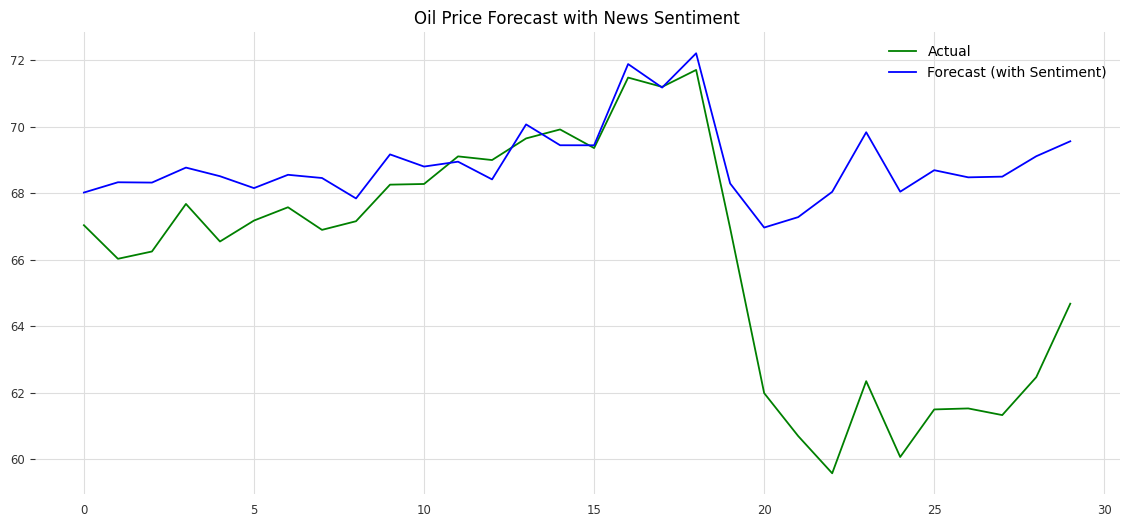

In [658]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(y_test.values, label='Actual', color='green')
plt.plot(y_pred, label='Forecast (with Sentiment)', color='blue')
plt.title("Oil Price Forecast with News Sentiment")
plt.grid(True)
plt.legend()
plt.show()


In [660]:
features = ['lag_1', 'lag_2','lag_3', 'rolling_mean_5', 'return_1', 'volume_scaled','SMA_100','SMA_20','daily_sentiment','sentiment_std','news_count','sentiment_lag1','sentiment_lag2']
X = df_ml[features]
y = df_ml['Close']


In [661]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)


In [724]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_7, y_train_7)

y_pred_rf_7 = rf_model.predict(X_test_7)


In [662]:
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"✅ Random Forest + News RMSE: {rmse_rf:.4f}")
print(f"✅ Random Forest + News MAE: {mae_rf:.4f}")


✅ Random Forest + News RMSE: 3.6153
✅ Random Forest + News MAE: 2.4422


In [725]:
rmse_rf = mean_squared_error(y_test_7, y_pred_rf_7, squared=False)
mae_rf = mean_absolute_error(y_test_7, y_pred_rf_7)

print(f"✅ Random Forest + News RMSE: {rmse_rf:.4f}")
print(f"✅ Random Forest + News MAE: {mae_rf:.4f}")


✅ Random Forest + News RMSE: 1.4043
✅ Random Forest + News MAE: 1.2434


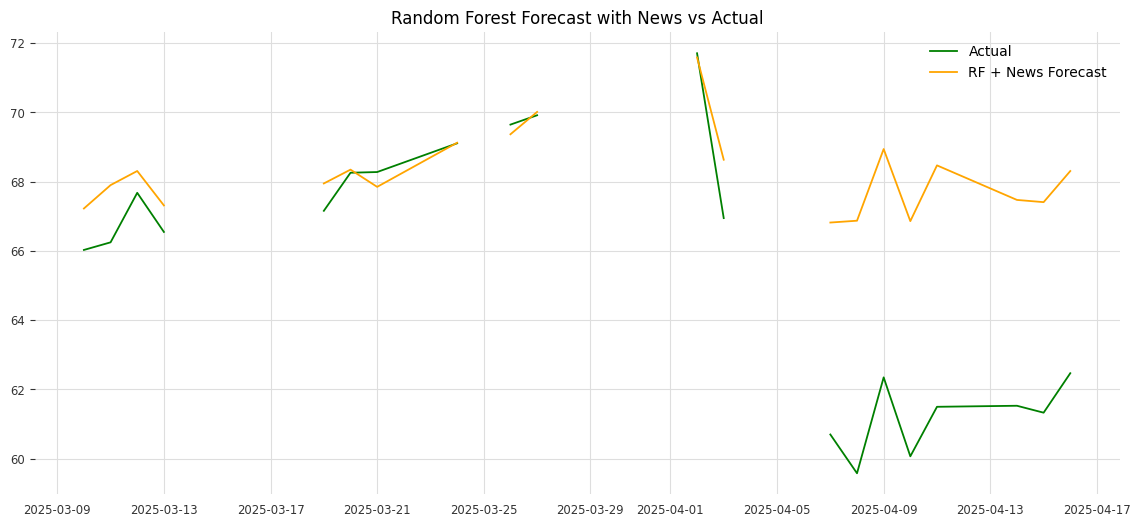

In [663]:
plt.figure(figsize=(14,6))
plt.plot(y_test.index, y_test.values, label='Actual', color='green')
plt.plot(y_test.index, y_pred_rf, label='RF + News Forecast', color='orange')
plt.title("Random Forest Forecast with News vs Actual")
plt.grid(True)
plt.legend()
plt.show()


In [736]:
df_ml.head()

AttributeError: 'NoneType' object has no attribute 'head'

In [664]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(df_ml[features])
y_scaled = scaler_y.fit_transform(df_ml[[target]])


In [665]:
def create_sequences(X, y, window=10):
    Xs, ys = [], []
    for i in range(window, len(X)):
        Xs.append(X[i-window:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_sequences(X_scaled, y_scaled, window=10)


In [666]:
X_train, X_test = X_seq[:-30], X_seq[-30:]
y_train, y_test = y_seq[:-30], y_seq[-30:]


In [667]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=30, batch_size=16, verbose=1)


/Users/sumitkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1127
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0150
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0112
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0098
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0095
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0082
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0075
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0072
Epoch 9/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0066
Epoch 10/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080
Epoch 11/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059
Epoch 12/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060
Epoch 13/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064
Epoch 14/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071
Epoch 15/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050
Epoch 16/30
28/28

In [668]:
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


In [669]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(y_test_actual, y_pred, squared=False)
mae = mean_absolute_error(y_test_actual, y_pred)

print(f"✅ LSTM + News RMSE: {rmse:.4f}")
print(f"✅ LSTM + News MAE: {mae:.4f}")


✅ LSTM + News RMSE: 3.4407
✅ LSTM + News MAE: 2.5471


In [737]:
df_ml=filtered_df.copy

In [738]:
df_ml

<bound method NDFrame.copy of            date  \
1178 2023-01-02   
1177 2023-01-03   
1176 2023-01-04   
1175 2023-01-05   
1174 2023-01-05   
...         ...   
4    2025-04-14   
3    2025-04-15   
2    2025-04-16   
1    2025-04-16   
0    2025-04-16   

                                                                 title  
1178       Analysts Predict 1 Million Bpd Drop in Russian Crude Output  
1177                         OPEC Production Creeps Higher In December  
1176            OPEC’s Oil Production Rises By 120,000 Bpd In December  
1175   WTI Crude Ticks Higher After EIA Confirms Small Inventory Build  
1174  One Of The World's Largest Oilfields Faces Delays In Development  
...                                                                ...  
4                       Lower Oil Prices Threaten Permian Basin Growth  
3                              U.S. Oil Production Cuts May Be Avoided  
2         U.S. Onshore Oil Production Faces Economic Policy Challenges  
1          

In [742]:
import pandas as pd
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler

# Use only Close column
series = TimeSeries.from_dataframe(df_ml[['Close']])

# Scale the series
scaler = Scaler()
series_scaled = scaler.fit_transform(series)


In [670]:
train, test = series_scaled[:-30], series_scaled[-30:]


In [744]:
import torch
import torch.nn as nn

class TimeSeriesTransformer(nn.Module):
    def __init__(self, input_size, d_model, nhead, num_layers, dropout=0.1):
        super().__init__()
        self.embedding = nn.Linear(input_size, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dropout=dropout)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc_out = nn.Linear(d_model, 1)

    def forward(self, src):
        """
        src: shape [batch, seq_len, input_size]
        """
        x = self.embedding(src)  # [B, L, d_model]
        x = x.permute(1, 0, 2)   # [L, B, d_model] for transformer
        x = self.transformer(x)
        x = x.permute(1, 0, 2)   # [B, L, d_model]
        out = self.fc_out(x[:, -1, :])  # take last output
        return out


In [752]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Use merged_df with datetime index and Close price
df = df_ml[['Close']].copy()
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

X_7, y_7 = [], []
window = 14
for i in range(len(scaled) - window - 7):  
    X_7.append(scaled[i:i+window])
    y_7.append(scaled[i+window:i+window+1][0])

X_7, y_7 = np.array(X_7), np.array(y_7)

# Train-test split
X_train_7, y_train_7 = X_7[:-7], y_7[:-7]
X_test_7, y_test_7 = X_7[-7:], y_7[-7:]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Use merged_df with datetime index and Close price
df = df_ml[['Close']].copy()
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

X, y = [], []
window = 60
for i in range(len(scaled) - window - 30):  # Leave last 30 for test
    X.append(scaled[i:i+window])
    y.append(scaled[i+window:i+window+1][0])

X, y = np.array(X), np.array(y)

# Train-test split
X_train, y_train = X[:-30], y[:-30]
X_test, y_test = X[-30:], y[-30:]


In [674]:
from torch.utils.data import TensorDataset, DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TimeSeriesTransformer(input_size=1, d_model=64, nhead=4, num_layers=2).to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_loader = DataLoader(TensorDataset(torch.Tensor(X_train), torch.Tensor(y_train)), batch_size=32, shuffle=True)

for epoch in range(50):
    model.train()
    epoch_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        out = model(xb)
        loss = criterion(out.squeeze(), yb.squeeze())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {epoch_loss:.4f}")


/Users/sumitkumar/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 0, Loss: 9.2480
Epoch 10, Loss: 0.0781
Epoch 20, Loss: 0.0542
Epoch 30, Loss: 0.0441
Epoch 40, Loss: 0.0336


In [756]:
from torch.utils.data import TensorDataset, DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TimeSeriesTransformer(input_size=1, d_model=64, nhead=4, num_layers=2).to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_loader = DataLoader(TensorDataset(torch.Tensor(X_train_7), torch.Tensor(y_train_7)), batch_size=32, shuffle=False)

for epoch in range(50):
    model.train()
    epoch_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        out = model(xb)
        loss = criterion(out.squeeze(), yb.squeeze())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {epoch_loss:.4f}")


/Users/sumitkumar/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 0, Loss: 20.7597
Epoch 10, Loss: 0.1808
Epoch 20, Loss: 0.1499
Epoch 30, Loss: 0.1328
Epoch 40, Loss: 0.1198


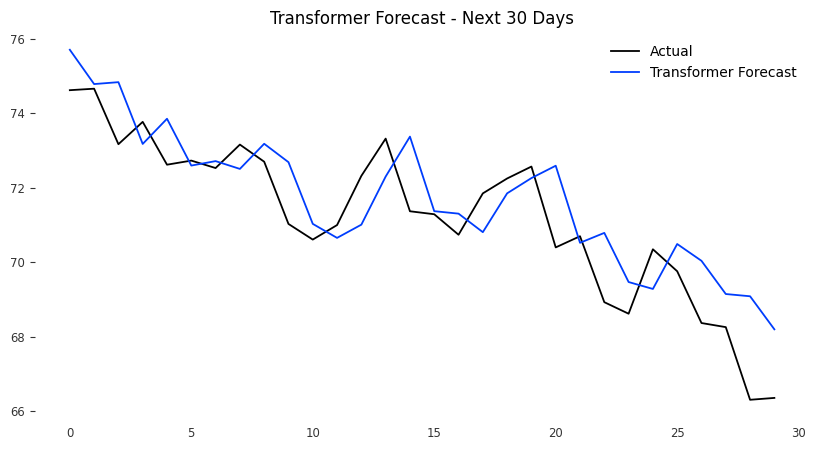

In [675]:
model.eval()
preds = []
with torch.no_grad():
    for x in torch.Tensor(X_test).to(device):
        pred = model(x.unsqueeze(0)).cpu().numpy().flatten()[0]
        preds.append(pred)

# Inverse transform
preds_rescaled = scaler.inverse_transform(np.array(preds).reshape(-1, 1)).flatten()
y_true = scaler.inverse_transform(np.array(y_test).reshape(-1, 1)).flatten()

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(y_true, label="Actual")
plt.plot(preds_rescaled, label="Transformer Forecast")
plt.title("Transformer Forecast - Next 30 Days")
plt.legend()
plt.grid()
plt.show()


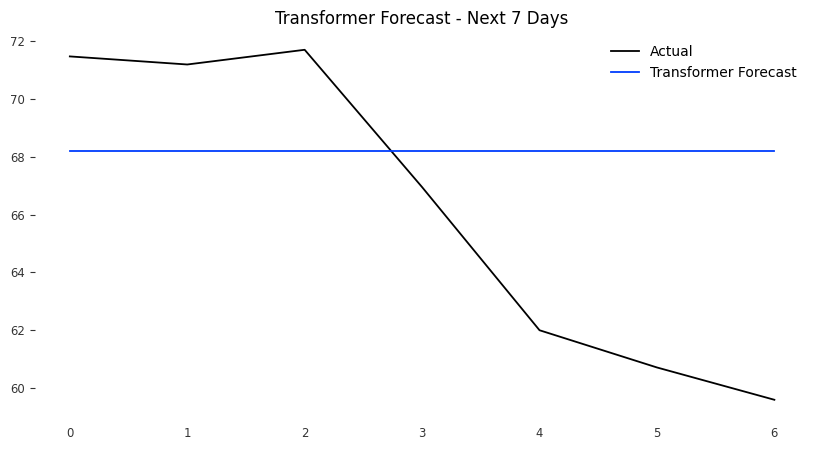

In [757]:
model.eval()
preds_7 = []
with torch.no_grad():
    for x in torch.Tensor(X_test_7).to(device):
        pred_7 = model(x.unsqueeze(0)).cpu().numpy().flatten()[0]
        preds_7.append(pred_7)

# Inverse transform
preds_rescaled_7 = scaler.inverse_transform(np.array(preds).reshape(-1, 1)).flatten()
y_true_7 = scaler.inverse_transform(np.array(y_test_7).reshape(-1, 1)).flatten()

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(y_true_7, label="Actual")
plt.plot(preds_rescaled_7, label="Transformer Forecast")
plt.title("Transformer Forecast - Next 7 Days")
plt.legend()
plt.grid()
plt.show()


In [676]:
# RMSE
rmse = np.sqrt(mean_squared_error(y_true, preds_rescaled))

# MAE
mae = mean_absolute_error(y_true, preds_rescaled)

# MAPE (optional)
mape = np.mean(np.abs((y_true - preds_rescaled) / y_true)) * 100

# Print results
print(f"✅ Transformer RMSE: {rmse:.4f}")
print(f"✅ Transformer MAE : {mae:.4f}")
print(f"✅ Transformer MAPE: {mape:.2f}%")


✅ Transformer RMSE: 1.2028
✅ Transformer MAE : 0.9787
✅ Transformer MAPE: 1.39%


In [758]:
# RMSE
rmse = np.sqrt(mean_squared_error(y_true_7, preds_rescaled_7))

# MAE
mae = mean_absolute_error(y_true_7, preds_rescaled_7)

# MAPE (optional)
mape = np.mean(np.abs((y_true_7 - preds_rescaled_7) / y_true_7)) * 100

# Print results
print(f"✅ Transformer RMSE: {rmse:.4f}")
print(f"✅ Transformer MAE : {mae:.4f}")
print(f"✅ Transformer MAPE: {mape:.2f}%")


✅ Transformer RMSE: 5.3823
✅ Transformer MAE : 4.7673
✅ Transformer MAPE: 7.49%


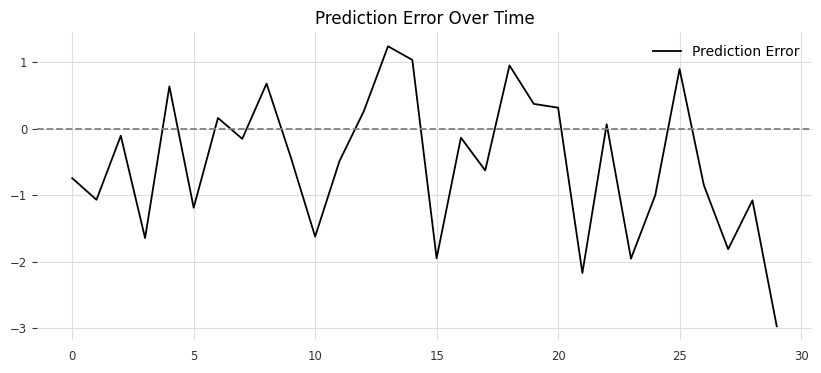

In [486]:
error = y_true - preds_rescaled

plt.figure(figsize=(10,4))
plt.plot(error, label='Prediction Error')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Prediction Error Over Time")
plt.grid(True)
plt.legend()
plt.show()


In [514]:
df_ml.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            466, 467, 468, 469, 470, 471, 472, 473, 474, 475],
           dtype='int64', name='time', length=476)

In [490]:
df_ml2=filter_df.copy

In [491]:
df_ml2

<bound method NDFrame.copy of                 Close       High        Low       Open  Volume    Return  \
Date                                                                       
2023-01-03  76.930000  81.500000  76.599998  80.570000  338520       NaN   
2023-01-04  72.839996  77.419998  72.730003  77.250000  352434 -0.053165   
2023-01-05  73.669998  74.919998  72.459999  73.250000  300731  0.011395   
2023-01-06  73.769997  75.470001  73.239998  73.970001  258128  0.001357   
2023-01-09  74.629997  76.739998  73.470001  73.470001  329290  0.011658   
...               ...        ...        ...        ...     ...       ...   
2025-04-10  60.070000  63.340000  58.759998  62.709999  391826 -0.036568   
2025-04-11  61.500000  61.869999  59.430000  60.200001  306231  0.023806   
2025-04-14  61.529999  62.680000  60.590000  61.700001  238068  0.000488   
2025-04-15  61.330002  62.060001  60.880001  61.580002  197404 -0.003250   
2025-04-16  62.470001  62.980000  60.439999  61.540001  21

In [628]:
df_ml2 = df.copy()

# Lag features (yesterday, day before, etc.)
df_ml2['lag_1'] = df_ml2['Close'].shift(1)
df_ml2['lag_2'] = df_ml2['Close'].shift(2)
df_ml2['lag_3'] = df_ml2['Close'].shift(3)

# Rolling mean (past 5-day average)
df_ml2['rolling_mean_5'] = df_ml2['Close'].rolling(window=5).mean()

# Daily returns
df_ml2['return_1'] = df_ml2['Close'].pct_change(1)




In [629]:
df_ml2

,Close,High,Low,Open,Volume,SMA_30,Abs_Return,lag_1,lag_2,lag_3,rolling_mean_5,return_1
Date,,,,,,,,,,,,
2005-04-18,50.369999,51.200001,49.660000,50.430000,70860,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-19,52.290001,52.349998,50.299999,50.299999,59946,NaN,NaN,50.369999,NaN,NaN,NaN,0.038118
2005-04-20,52.439999,53.099998,51.950001,52.189999,120966,NaN,NaN,52.290001,50.369999,NaN,NaN,0.002869
2005-04-21,54.200001,54.299999,53.000000,53.869999,99239,NaN,NaN,52.439999,52.290001,50.369999,NaN,0.033562
2005-04-22,55.389999,55.900002,54.200001,54.230000,113285,NaN,NaN,54.200001,52.439999,52.290001,52.938,0.021956
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-11,61.500000,61.869999,59.430000,60.200001,306231,66.759334,0.023806,60.070000,62.349998,59.580002,60.840,0.023806
2025-04-14,61.529999,62.680000,60.590000,61.700001,238068,66.531334,0.000488,61.500000,60.070000,62.349998,61.006,0.000488
2025-04-15,61.330002,62.060001,60.880001,61.580002,197404,66.300334,0.003250,61.529999,61.500000,60.070000,61.356,-0.003250


In [630]:
df_ml2['volume_scaled'] = MinMaxScaler().fit_transform(df_ml2[['Volume']])

In [631]:
df_ml2

,Close,High,Low,Open,Volume,SMA_30,Abs_Return,lag_1,lag_2,lag_3,rolling_mean_5,return_1,volume_scaled
Date,,,,,,,,,,,,,
2005-04-18,50.369999,51.200001,49.660000,50.430000,70860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030967
2005-04-19,52.290001,52.349998,50.299999,50.299999,59946,NaN,NaN,50.369999,NaN,NaN,NaN,0.038118,0.026198
2005-04-20,52.439999,53.099998,51.950001,52.189999,120966,NaN,NaN,52.290001,50.369999,NaN,NaN,0.002869,0.052864
2005-04-21,54.200001,54.299999,53.000000,53.869999,99239,NaN,NaN,52.439999,52.290001,50.369999,NaN,0.033562,0.043369
2005-04-22,55.389999,55.900002,54.200001,54.230000,113285,NaN,NaN,54.200001,52.439999,52.290001,52.938,0.021956,0.049508
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-11,61.500000,61.869999,59.430000,60.200001,306231,66.759334,0.023806,60.070000,62.349998,59.580002,60.840,0.023806,0.133829
2025-04-14,61.529999,62.680000,60.590000,61.700001,238068,66.531334,0.000488,61.500000,60.070000,62.349998,61.006,0.000488,0.104040
2025-04-15,61.330002,62.060001,60.880001,61.580002,197404,66.300334,0.003250,61.529999,61.500000,60.070000,61.356,-0.003250,0.086269


In [632]:
df_ml2=df_ml2[df_ml2.index>"2023-05-25"]

In [633]:
df_ml2

,Close,High,Low,Open,Volume,SMA_30,Abs_Return,lag_1,lag_2,lag_3,rolling_mean_5,return_1,volume_scaled
Date,,,,,,,,,,,,,
2023-05-26,72.669998,73.050003,71.489998,71.889999,261498,73.859667,0.011694,71.830002,74.339996,72.910004,72.748000,0.011694,0.114280
2023-05-30,69.459999,73.550003,69.019997,73.230003,440862,73.480667,0.044172,72.669998,71.830002,74.339996,72.242000,-0.044172,0.192665
2023-05-31,68.089996,69.690002,67.029999,69.620003,444787,73.055001,0.019724,69.459999,72.669998,71.830002,71.277998,-0.019724,0.194380
2023-06-01,70.099998,71.070000,67.510002,67.599998,395393,72.753000,0.029520,68.089996,69.459999,72.669998,70.429999,0.029520,0.172794
2023-06-02,71.739998,72.169998,70.000000,70.209999,322596,72.568000,0.023395,70.099998,68.089996,69.459999,70.411998,0.023395,0.140981
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-11,61.500000,61.869999,59.430000,60.200001,306231,66.759334,0.023806,60.070000,62.349998,59.580002,60.840000,0.023806,0.133829
2025-04-14,61.529999,62.680000,60.590000,61.700001,238068,66.531334,0.000488,61.500000,60.070000,62.349998,61.006000,0.000488,0.104040
2025-04-15,61.330002,62.060001,60.880001,61.580002,197404,66.300334,0.003250,61.529999,61.500000,60.070000,61.356000,-0.003250,0.086269


In [634]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Select numeric features only (excluding datetime index for now)
features = ['Close', 'lag_1', 'lag_2', 'lag_3', 'rolling_mean_5', 'return_1', 'volume_scaled']
df_model = df_ml2[features].dropna().copy()

# Scale all features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_model)


In [635]:
X, y = [], []
window = 60
target_col_index = 0  # predicting Close

for i in range(len(scaled_data) - window - 30):
    X.append(scaled_data[i:i+window])
    y.append(scaled_data[i+window:i+window+30, target_col_index])  # next 30 days of Close

X, y = np.array(X), np.array(y)


In [636]:
X_train, y_train = X[:-1], y[:-1]
X_test, y_test = X[-1:], y[-1:]


In [637]:
import torch
import torch.nn as nn

class TimeSeriesTransformer(nn.Module):
    def __init__(self, input_size, d_model=64, nhead=4, num_layers=2, dropout=0.1, forecast_len=30):
        super().__init__()
        self.embedding = nn.Linear(input_size, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model, nhead, dropout=dropout)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.decoder = nn.Linear(d_model, forecast_len)

    def forward(self, x):
        # x: [batch, seq_len, input_size]
        x = self.embedding(x)               # [B, L, d_model]
        x = x.permute(1, 0, 2)              # [L, B, d_model]
        x = self.transformer(x)
        x = x.permute(1, 0, 2)              # [B, L, d_model]
        x = self.decoder(x[:, -1, :])       # use last time step
        return x


In [638]:
from torch.utils.data import DataLoader, TensorDataset

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = TimeSeriesTransformer(input_size=X.shape[2]).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_loader = DataLoader(TensorDataset(torch.Tensor(X_train), torch.Tensor(y_train)), batch_size=32, shuffle=True)

# Training loop
for epoch in range(50):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        pred = model(xb)
        loss = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if epoch % 10 == 0:
        print(f"Epoch {epoch} | Loss: {total_loss:.4f}")


/Users/sumitkumar/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 0 | Loss: 1.6727
Epoch 10 | Loss: 0.2947
Epoch 20 | Loss: 0.2250
Epoch 30 | Loss: 0.1998
Epoch 40 | Loss: 0.1576


In [639]:
model.eval()
with torch.no_grad():
    X_input = torch.Tensor(X_test).to(device)
    preds = model(X_input).cpu().numpy().flatten()


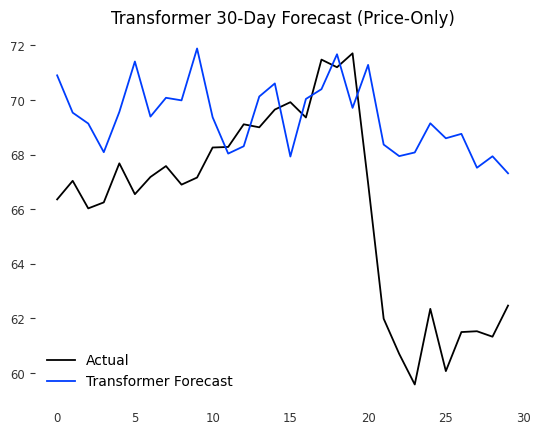

In [640]:
# Put predictions back into array shape for inverse transform
rescaled_input = np.zeros((len(preds), scaled_data.shape[1]))
rescaled_input[:, 0] = preds  # set only Close column

# Inverse only Close column
y_pred = scaler.inverse_transform(rescaled_input)[:, 0]
y_true = scaler.inverse_transform(np.hstack([y_test.T, np.zeros((30, scaled_data.shape[1]-1))]))[:, 0]

import matplotlib.pyplot as plt
plt.plot(y_true, label="Actual")
plt.plot(y_pred, label="Transformer Forecast")
plt.legend()
plt.title("Transformer 30-Day Forecast (Price-Only)")
plt.grid()
plt.show()


In [641]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"✅ RMSE: {rmse:.4f}")
print(f"✅ MAE : {mae:.4f}")
print(f"✅ MAPE: {mape:.2f}%")


✅ RMSE: 4.4078
✅ MAE : 3.6068
✅ MAPE: 5.66%


In [759]:
class TimeSeriesTransformer(nn.Module):
    def __init__(self, input_size, d_model=64, nhead=4, num_layers=2, dropout=0.1, forecast_len=7):
        super().__init__()
        self.embedding = nn.Linear(input_size, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model, nhead, dropout=dropout)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.decoder = nn.Linear(d_model, forecast_len)

    def forward(self, x):
        x = self.embedding(x)         # [B, L, d_model]
        x = x.permute(1, 0, 2)        # [L, B, d_model]
        x = self.transformer(x)
        x = x.permute(1, 0, 2)        # [B, L, d_model]
        x = self.decoder(x[:, -1, :]) # Use only last time step
        return x


In [785]:
df_ml


,Close,High,Low,Open,Volume,SMA_30,Abs_Return,Return,Volatility_7,SMA_20,SMA_100,lag_1,lag_2,lag_3,rolling_mean_5,return_1,sentiment_std,sentiment_lag1,sentiment_lag2
date,,,,,,,,,,,,,,,,,,,
2023-05-25,71.830002,74.370003,70.980003,74.209999,422637,74.188001,0.033764,-0.033764,0.021067,72.1110,75.8597,74.339996,72.910004,71.989998,72.524001,-0.033764,0.385145,-0.436746,0.999996
2023-05-26,72.669998,73.050003,71.489998,71.889999,261498,73.859667,0.011694,0.011694,0.018522,71.9055,75.8171,71.830002,74.339996,72.910004,72.748000,0.011694,0.000000,0.715063,-0.436746
2023-05-30,69.459999,73.550003,69.019997,73.230003,440862,73.480667,0.044172,-0.044172,0.024786,71.5955,75.7833,72.669998,71.830002,74.339996,72.242000,-0.044172,0.000000,0.305092,-0.999986
2023-05-31,68.089996,69.690002,67.029999,69.620003,444787,73.055001,0.019724,-0.019724,0.025435,71.4170,75.7275,69.459999,72.669998,71.830002,71.277998,-0.019724,0.328183,-0.999937,0.305092
2023-06-01,70.099998,71.070000,67.510002,67.599998,395393,72.753000,0.029520,0.029520,0.028734,71.4920,75.6908,68.089996,69.459999,72.669998,70.429999,0.029520,0.000000,0.232065,-0.999937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-11,61.500000,61.869999,59.430000,60.200001,306231,66.759334,0.023806,0.023806,0.044137,66.6375,70.1965,60.070000,62.349998,59.580002,60.840000,0.023806,0.435990,0.382058,-0.001436
2025-04-14,61.529999,62.680000,60.590000,61.700001,238068,66.531334,0.000488,0.000488,0.039651,66.3350,70.1202,61.500000,60.070000,62.349998,61.006000,0.000488,0.337550,0.372046,-0.483924
2025-04-15,61.330002,62.060001,60.880001,61.580002,197404,66.300334,0.003250,-0.003250,0.028402,66.0565,70.0396,61.529999,61.500000,60.070000,61.356000,-0.003250,0.000000,0.757499,0.372046


In [779]:
df_ml=df_ml.drop(columns='news_count')

In [780]:
# Use df_ml for price + news; drop rows with NaNs
data = df_ml.dropna().copy()

# Set features
features = ['Close', 'lag_1', 'lag_2', 'lag_3', 'rolling_mean_5', 'return_1',
             'sentiment_std', 'sentiment_lag1', 'sentiment_lag2']

# Normalize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[features])

# Create sequences
X, y = [], []
window = 60
target_col_index = 0  # Predict Close

for i in range(len(scaled_data) - window - 7):
    X.append(scaled_data[i:i+window])
    y.append(scaled_data[i+window:i+window+7, target_col_index])  # Next 7 Close values

X, y = np.array(X), np.array(y)

# Train/Test split
X_train, y_train = X[:-1], y[:-1]
X_test, y_test = X[-1:], y[-1:]


In [781]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TimeSeriesTransformer(input_size=X.shape[2]).to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
train_loader = DataLoader(TensorDataset(torch.Tensor(X_train), torch.Tensor(y_train)), batch_size=32, shuffle=True)

# Training loop
for epoch in range(50):
    model.train()
    epoch_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {epoch_loss:.4f}")


/Users/sumitkumar/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 0, Loss: 2.1730
Epoch 10, Loss: 0.1698
Epoch 20, Loss: 0.1139
Epoch 30, Loss: 0.0878
Epoch 40, Loss: 0.0738


In [782]:
model.eval()
with torch.no_grad():
    X_input = torch.Tensor(X_test).to(device)
    preds = model(X_input).cpu().numpy().flatten()


In [783]:
# Reconstruct full feature vector for inverse scaling
rescaled_input = np.zeros((len(preds), scaled_data.shape[1]))
rescaled_input[:, 0] = preds  # only Close

# Inverse transform
preds_rescaled = scaler.inverse_transform(rescaled_input)[:, 0]
y_true = scaler.inverse_transform(np.hstack([
    y_test.T, np.zeros((7, scaled_data.shape[1] - 1))
]))[:, 0]


In [784]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_true, preds_rescaled))
mae = mean_absolute_error(y_true, preds_rescaled)
mape = np.mean(np.abs((y_true - preds_rescaled) / y_true)) * 100

print(f"✅ Transformer + News (7-Day)")
print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"MAPE : {mape:.2f}%")


✅ Transformer + News (7-Day)
RMSE : 7.1474
MAE  : 7.0704
MAPE : 11.61%
